# Project Milestone 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
import unicodedata
import re
import csv
import os 
import io
import pycld2 as cld2
# conda install -c conda-forge pycld2

---
## Importing datasets


In [2]:
current_dir = os.getcwd()
parent_folder_path = os.path.abspath(os.path.join(current_dir, ".."))
data_path = os.path.join(parent_folder_path, "data")

path_ba = data_path + '/BeerAdvocate'
path_rb = data_path + '/RateBeer'
path_mbd = data_path + '/matched_beer_data'

beers_ba = pd.read_csv(f"{path_ba}/{'beers.csv'}")
users_ba = pd.read_csv(f"{path_ba}/{'users.csv'}")
breweries_ba = pd.read_csv(f"{path_ba}/{'breweries.csv'}")

beers_rb = pd.read_csv(f"{path_rb}/{'beers.csv'}")
users_rb = pd.read_csv(f"{path_rb}/{'users.csv'}")
breweries_rb = pd.read_csv(f"{path_rb}/{'breweries.csv'}")  

ratings_mbd = pd.read_csv(f"{path_mbd}/{'ratings.csv'}", header = 1)  
beers_mbd = pd.read_csv(f"{path_mbd}/{'beers.csv'}", header = 1) 
breweries_mbd = pd.read_csv(f"{path_mbd}/{'breweries.csv'}", header = 1) 
users_mbd = pd.read_csv(f"{path_mbd}/{'users.csv'}", header = 1) 

In [3]:
# Main problem is the length of the txt file 
# We will iterate each line, one by one, to avoid memory saturation 

# Open, read only, utf-8 for specific characters 

def txt_to_csv(path,name):

    if os.path.exists(f"{path}/{name}.csv"):
        print(f"{name}.csv is already present in the folder")
        return  # Exit the function
    
    
    with gzip.open(f'{path}/{name}.txt.gz', 'rt', encoding='utf-8') as text_file:
        # Create a CSV file
        with open(f'{path}/{name}.csv', 'w', newline='', encoding='utf-8') as csv_file:
            # CSV
            csv_writer = csv.writer(csv_file)
        
            # Dictionnary
            data = {}
            total_lines = 0
            headers_created = False

            # Each line of txt
            for line in text_file:
                line = line.strip()

                if not line: # when there is no line, then add retrieved elements to one row in the CSV
                    if data:
                        
                        if not headers_created:
                            # Create headers with keys from dictionnary
                            headers = list(data.keys())
                            csv_writer.writerow(headers)
                            headers_created = True


                        # Write the data to the CSV
                        row = [data.get(header, "") for header in headers]
                        csv_writer.writerow(row)
                        data = {}
                        total_lines += 1
                else:
                    # Check if the line contains the separator ": "
                    if ": " in line:
                        key, value = line.split(": ", 1)
                        data[key] = value
                    else:
                        pass

            # Last writing
            if data:
                row = [data.get(header, "") for header in headers]
                csv_writer.writerow(row)
                total_lines += 1

    print(f"Nombre total de commentaires : {total_lines}")
    print(f"Saved as {name}.csv in the corresponding path")


In [4]:
# Give the path_ ba, rb, mbd and the name of the file without the type.
# Convert Beeradvocate reviews to csv 
txt_to_csv(path_ba,"reviews")

reviews.csv is already present in the folder


In [5]:
# Convert Beeradvocate ratings to csv
txt_to_csv(path_ba,"ratings")

ratings.csv is already present in the folder


In [6]:
reviews_ba = pd.read_csv(f"{path_ba}/reviews.csv", nrows=100)
reviews_ba.head(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ..."
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim....."


In [7]:
ratings_ba = pd.read_csv(f"{path_ba}/ratings.csv", nrows=100)
ratings_ba.head(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True


In [50]:
txt_to_csv(path_rb,"reviews")
txt_to_csv(path_rb,"ratings")

Nombre total de commentaires : 7122074
Saved as reviews.csv in the corresponding path
Nombre total de commentaires : 7122074
Saved as ratings.csv in the corresponding path


In [9]:
reviews_rb = pd.read_csv(f"{path_rb}/reviews.csv", nrows=100)
reviews_rb.head(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."


In [10]:
ratings_rb = pd.read_csv(f"{path_rb}/ratings.csv", nrows=100)
ratings_rb.head(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."


In [12]:
## Pour vous donner une idée de comment recuperer des donnéees 

chunk_size = 10000

lowest_rating = float('inf')  # Initialisé à l'infini pour s'assurer que la première valeur sera inférieure
lowest_rating_row = None

# Parcourir le fichier CSV par chunks
for chunk in pd.read_csv(f"{path_ba}/reviews.csv", chunksize=chunk_size):
    # Trouver le rating le plus bas dans le chunk actuel
    chunk_lowest_rating = chunk['rating'].min()

    # Vérifier si le rating de ce chunk est inférieur au rating le plus bas jusqu'à présent
    if chunk_lowest_rating <= lowest_rating:
        lowest_rating = chunk_lowest_rating

        # Récupérer la ligne correspondante avec le rating le plus bas dans le chunk
        lowest_rating_row = chunk.loc[chunk['rating'].idxmin()]

# À la fin de la boucle, lowest_rating_row contient la ligne entière avec le rating le plus bas
print("Ligne avec le rating le plus bas:")
print(lowest_rating_row)


# en réalité il y a beacoup de bières notées à 1 du coup j'en ai juste selectionné avec cette technique.
# si on les veux toutes = on fait append dans un nouveau df...

Ligne avec le rating le plus bas:
beer_name                               Gold Coast Honey Pale Ale
beer_id                                                     14090
brewery_name                                   Gold Coast Brewpub
brewery_id                                                   7796
style                                            English Pale Ale
abv                                                           5.0
date                                                   1068548400
user_name                                                rastaman
user_id                                              rastaman.264
appearance                                                    1.0
aroma                                                         1.0
palate                                                        1.0
taste                                                         1.0
overall                                                       1.0
rating                                    

In [7]:
# deep copies of all dataframes 
beers_ba_f = beers_ba.copy(deep=True)
users_ba_f = users_ba.copy(deep=True)
breweries_ba_f = breweries_ba.copy(deep=True)

beers_rb_f = beers_rb.copy(deep=True)
users_rb_f = users_rb.copy(deep=True)
breweries_rb_f = breweries_rb.copy(deep=True)

ratings_mbd_f = ratings_mbd.copy(deep=True)
breweries_mbd_f = breweries_mbd.copy(deep=True)
beers_mbd_f = beers_mbd.copy(deep=True)
users_mbd_f = users_mbd.copy(deep=True)

# 1. beers.csv file study 

## Data observation 

In [5]:
beers_ba_f.shape

(280823, 15)

In [6]:
beers_rb_f.shape

(442081, 14)

In [7]:
beers_rb_f.columns

#14 columns. rb has different columns: 'overall_score', 'style_score'

Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')

In [8]:
beers_ba_f.columns

#15 columns. ba has different colums: 'nbr_reviews', 'ba_score', 'bros_score'
#overall_score == ba_score

Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')

In [9]:
beers_rb_f.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


In [10]:
beers_ba_f.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [11]:
beers_ba_f.isna().sum()

beer_id                           0
beer_name                         0
brewery_id                        0
brewery_name                      0
style                             0
nbr_ratings                       0
nbr_reviews                       0
avg                           32829
ba_score                     219623
bros_score                   275121
abv                           36024
avg_computed                  32841
zscore                       240538
nbr_matched_valid_ratings         0
avg_matched_valid_ratings    252551
dtype: int64

In [12]:
beers_rb_f.isna().sum()

# overall there are more missing values in rb 

beer_id                           0
beer_name                         0
brewery_id                        0
brewery_name                      0
style                             0
nbr_ratings                       0
overall_score                338053
style_score                  338013
avg                           46424
abv                           42094
avg_computed                  45391
zscore                       399853
nbr_matched_valid_ratings         0
avg_matched_valid_ratings    399853
dtype: int64

## Number of ratings 

In [65]:
print('Number of ratings in RateBeer: ', beers_rb_f['nbr_ratings'].sum())
print('Number of ratings in BeerAdvocate: ', beers_ba_f['nbr_ratings'].sum())

# more ratings in BeerAdvovcate

Number of ratings in RateBeer:  7122074
Number of ratings in BeerAdvocate:  8393032


In [66]:
beers_ba_f['nbr_ratings'].describe()

# ca note plus sur ba

count    280823.000000
mean         29.887267
std         231.010063
min           0.000000
25%           1.000000
50%           2.000000
75%           8.000000
max       16509.000000
Name: nbr_ratings, dtype: float64

In [12]:
beers_rb_f['nbr_ratings'].describe()

count    442081.000000
mean         16.110337
std          80.988812
min           0.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        5272.000000
Name: nbr_ratings, dtype: float64

Proviens du fichier "Matched beer data" --> ratings

## Style of beers

In [60]:
print('Number of style of beers in BeerAdvocate: ', len(beers_ba_f['style'].unique()))
print('Number of style of beers in RateBeer: ', len(beers_rb_f['style'].unique()))
print('Number of style of beers in Matched_beer_data: ', len(ratings_mbd_f['style'].unique()))

# more style in BeerAdvocate 

nbr_style_ba = beers_ba_f['style'].value_counts()
nbr_style_rb = beers_rb_f['style'].value_counts()
nbr_style_mbd = ratings_mbd_f['style'].value_counts()

Number of style of beers in BeerAdvocate:  104
Number of style of beers in RateBeer:  94
Number of style of beers in Matched_beer_data:  104


In [61]:
nbr_style_ba.head(10)

# most represented style in BA is American IPA, American Pale Ale, Saison - Farmhouse Ale

style
american ipa                        30433
american pale ale (apa)             17419
saison / farmhouse ale              14006
american double / imperial ipa      12279
american porter                      9377
american wild ale                    8994
american amber / red ale             8830
american double / imperial stout     7648
american stout                       7430
fruit / vegetable beer               6263
Name: count, dtype: int64

In [62]:
nbr_style_rb.head(10)

# most represented style in RB is Indian Pale Ale, American Pale Ale, Golden Ale/Blond Ale

style
India Pale Ale (IPA)    39898
American Pale Ale       25532
Golden Ale/Blond Ale    20514
Saison                  16012
Bitter                  14329
Spice/Herb/Vegetable    14047
Porter                  14019
Imperial IPA            13913
Stout                   13762
Imperial Stout          12913
Name: count, dtype: int64

## Scores 

/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

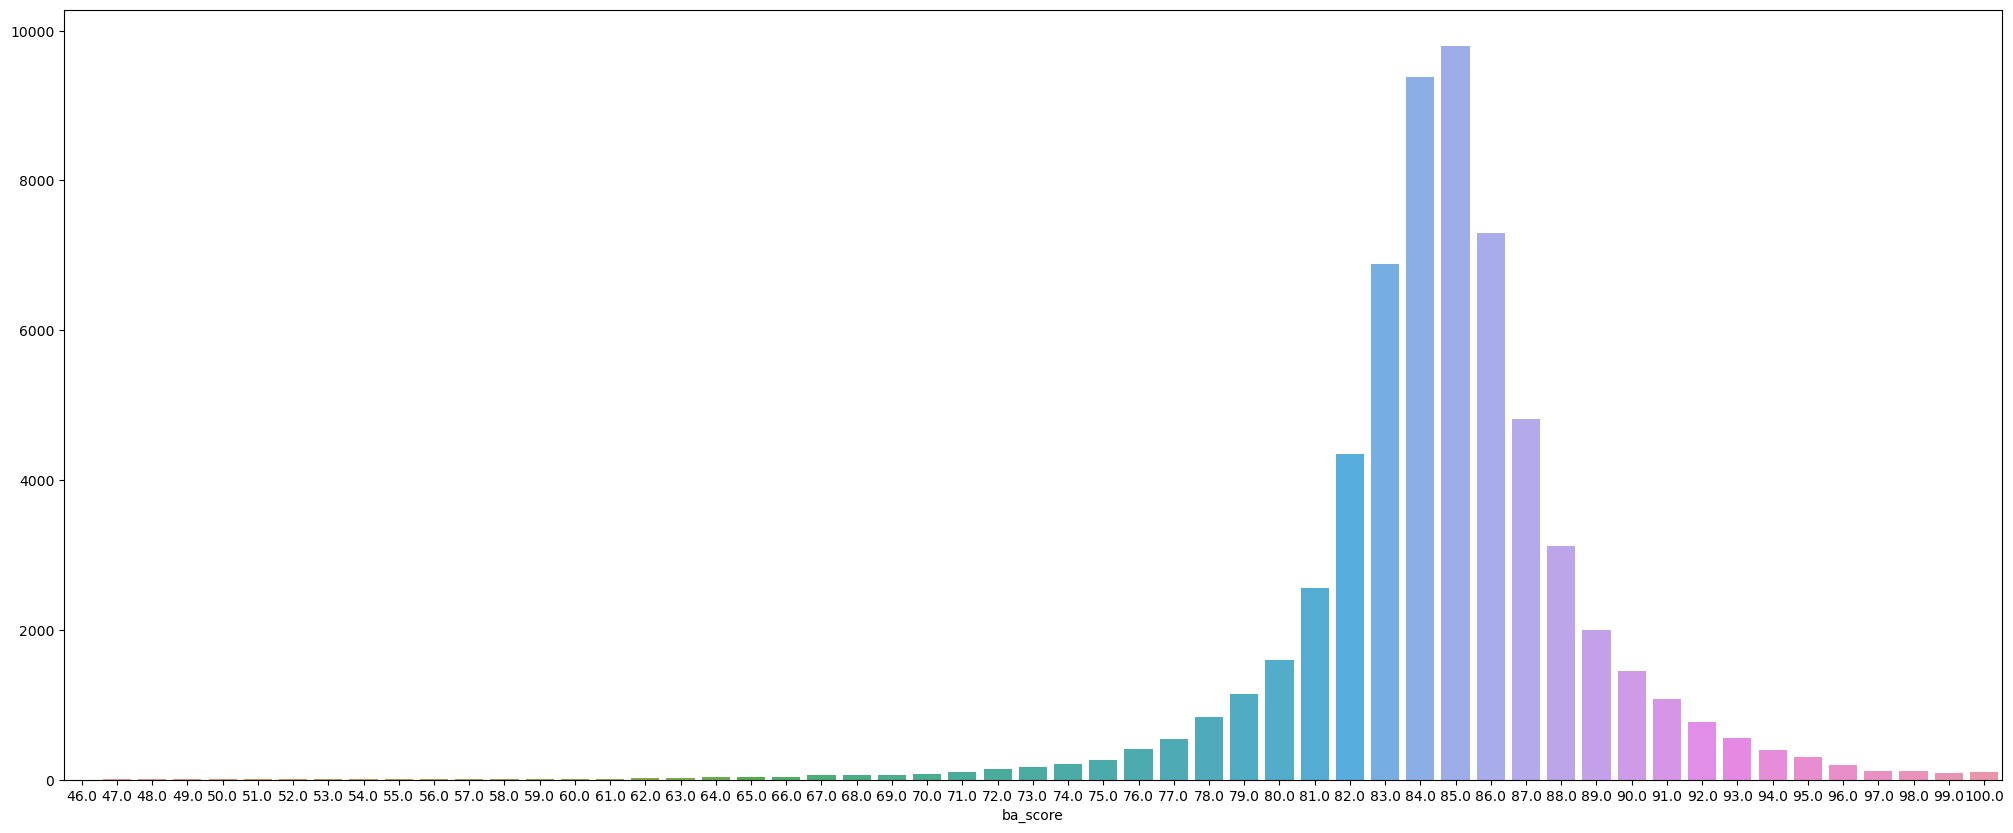

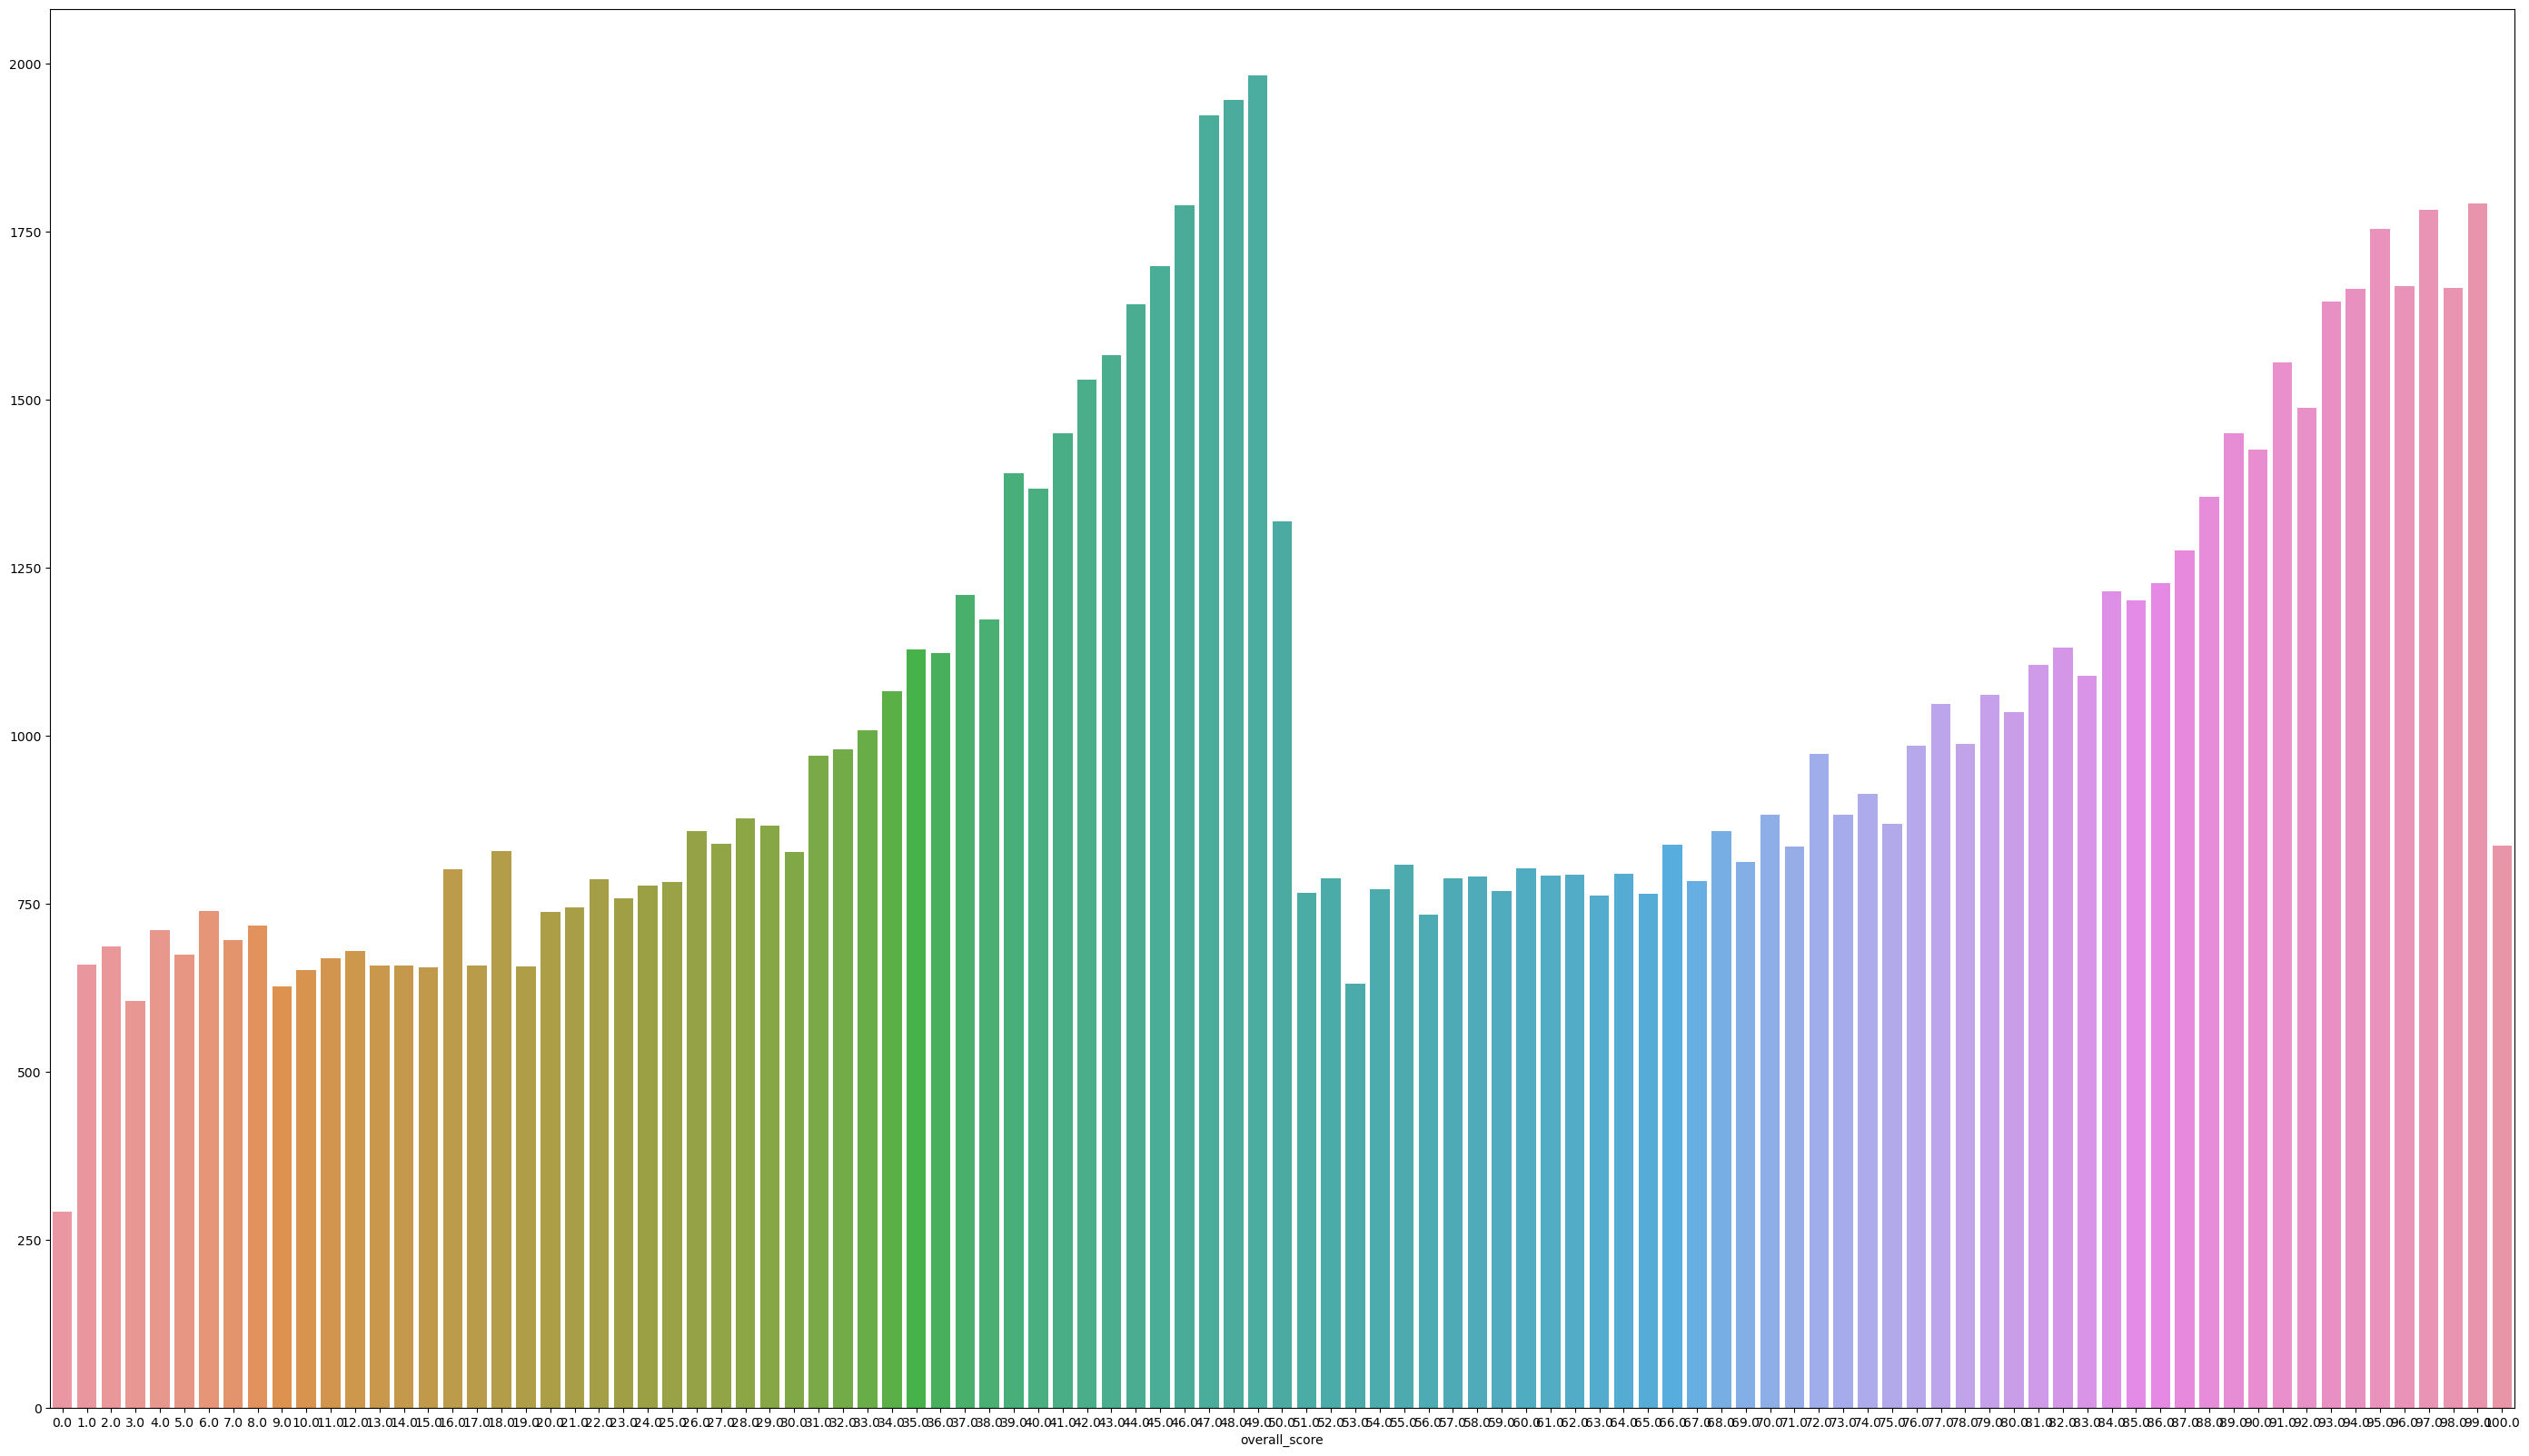

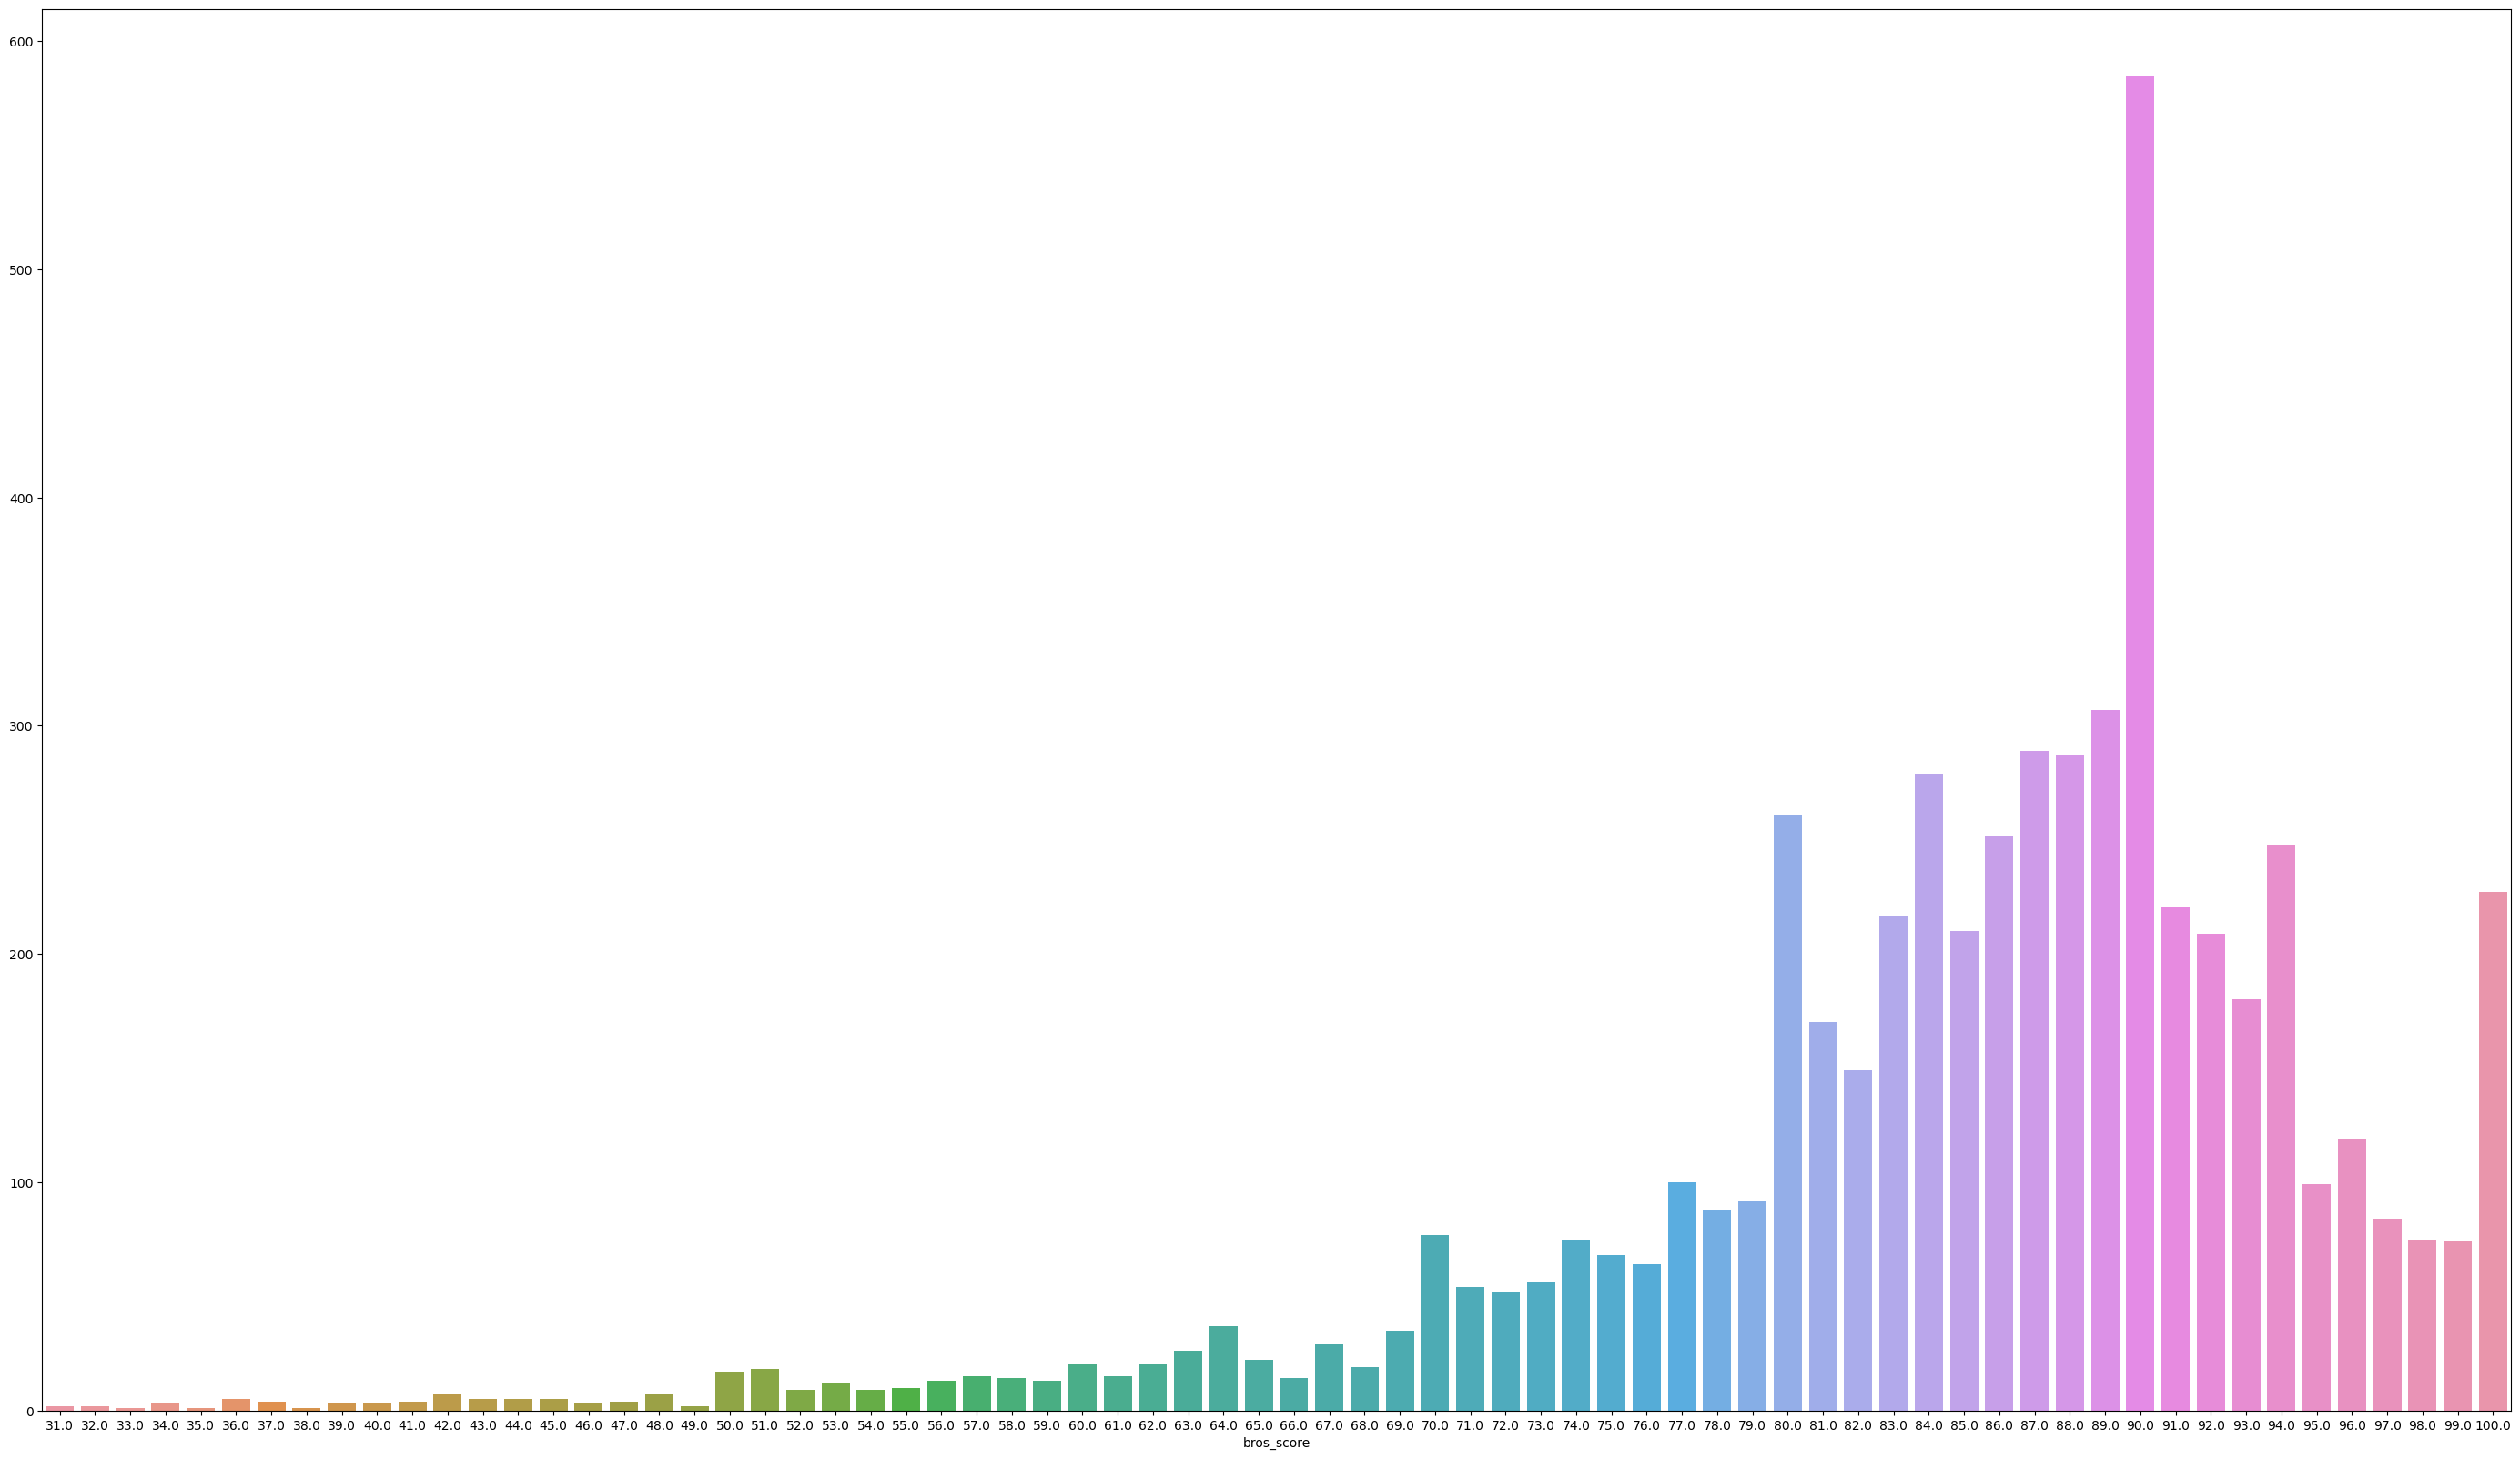

In [21]:
ba_score_count = beers_ba_f['ba_score'].value_counts()
rb_score_count = beers_rb_f['overall_score'].value_counts()
bros_score_count = beers_ba_f['bros_score'].value_counts()

plt.figure(figsize=(25, 10))
ax1 = sns.barplot(x=ba_score_count.index, y=ba_score_count.values)

plt.figure(figsize=(35, 20))
ax2 = sns.barplot(x=rb_score_count.index, y=rb_score_count.values)

plt.figure(figsize=(35, 20))
ax3 = sns.barplot(x=bros_score_count.index, y=bros_score_count.values)

# ba_score peut être approximé par une gaussienne 
# score de rb bcp plus diffus 
# bros score plus éparpillé, peut être plus accurate que ba_score 

In [64]:
beers_ba_f['ba_score'].describe()

count    61200.000000
mean        84.633284
std          4.052723
min         46.000000
25%         83.000000
50%         85.000000
75%         86.000000
max        100.000000
Name: ba_score, dtype: float64

In [65]:
beers_rb_f['overall_score'].describe()

# mean bcp plus grande pour ba, min quasi à 50 
# données de rb large std, min à 0

count    104028.000000
mean         55.680817
std          28.482652
min           0.000000
25%          34.000000
50%          53.000000
75%          83.000000
max         100.000000
Name: overall_score, dtype: float64

In [16]:
beers_ba_f['bros_score'].describe()


count    5702.000000
mean       84.806559
std        10.507735
min        31.000000
25%        81.000000
50%        87.000000
75%        91.000000
max       100.000000
Name: bros_score, dtype: float64

## Alcohol by volume 

In [14]:
beers_ba_f['abv'].describe()

count    244799.000000
mean          6.491370
std           2.054071
min           0.010000
25%           5.000000
50%           6.000000
75%           7.500000
max          67.500000
Name: abv, dtype: float64

In [66]:
beers_rb_f['abv'].describe()

# degree d'alcohol moyen a peu près pareil pour les deux sites

count    399987.000000
mean          6.065485
std           1.922965
min           0.010000
25%           4.800000
50%           5.600000
75%           7.000000
max         100.000000
Name: abv, dtype: float64

/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


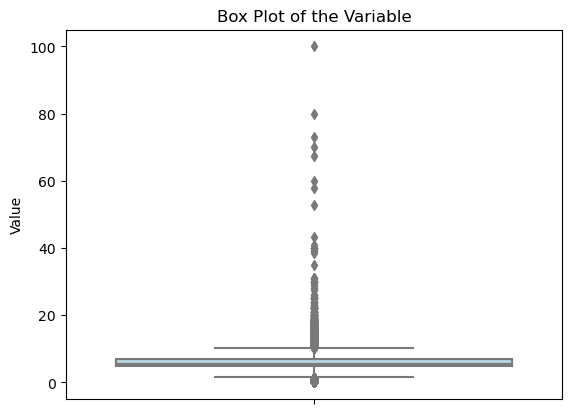

In [24]:
sns.boxplot(y=beers_rb_f['abv'], color='lightblue')
plt.title('Box Plot of the Variable')
plt.ylabel('Value')
plt.show()

/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


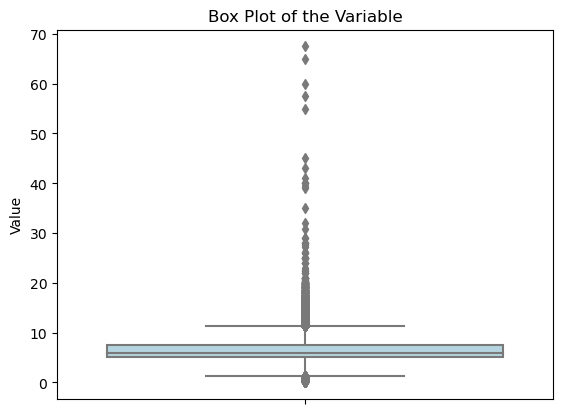

In [25]:
sns.boxplot(y=beers_ba_f['abv'], color='lightblue')
plt.title('Box Plot of the Variable')
plt.ylabel('Value')
plt.show()

# chelou y a des degrés bcp bcp bcp trop haut 

## Average score 

In [13]:
beers_ba_f['avg'].describe()

count    247994.000000
mean          3.721034
std           0.476003
min           0.000000
25%           3.500000
50%           3.780000
75%           4.010000
max           5.000000
Name: avg, dtype: float64

In [14]:
beers_rb_f['avg'].describe()

count    395657.000000
mean          3.026580
std           0.304503
min           0.000000
25%           2.870000
50%           3.020000
75%           3.180000
max           4.520000
Name: avg, dtype: float64

## Ratings per style of beer 

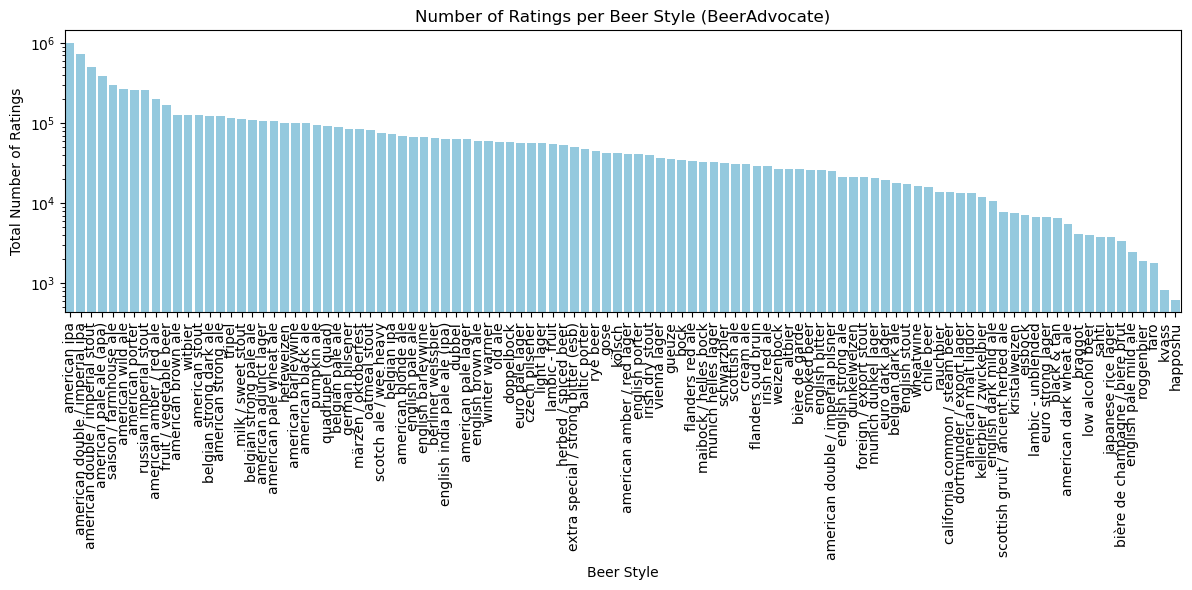

In [67]:
ba_ratings_style = beers_ba_f[['style', 'nbr_ratings']].groupby('style').sum().reset_index()
ba_ratings_style.head()

# Sort the data by the sum of ratings in descending order 
ba_ratings_style = ba_ratings_style.sort_values(by='nbr_ratings', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ba_ratings_style, x='style', y='nbr_ratings', color='skyblue')
plt.title('Number of Ratings per Beer Style (BeerAdvocate)')
plt.xlabel('Beer Style')
plt.ylabel('Total Number of Ratings')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.yscale('log')  # Set the y-axis to a log scale
plt.show()

# American IPA, American Double/Imperial IPA, American Double/Imperial Stout are the styles that received the highest number of ratings in ba

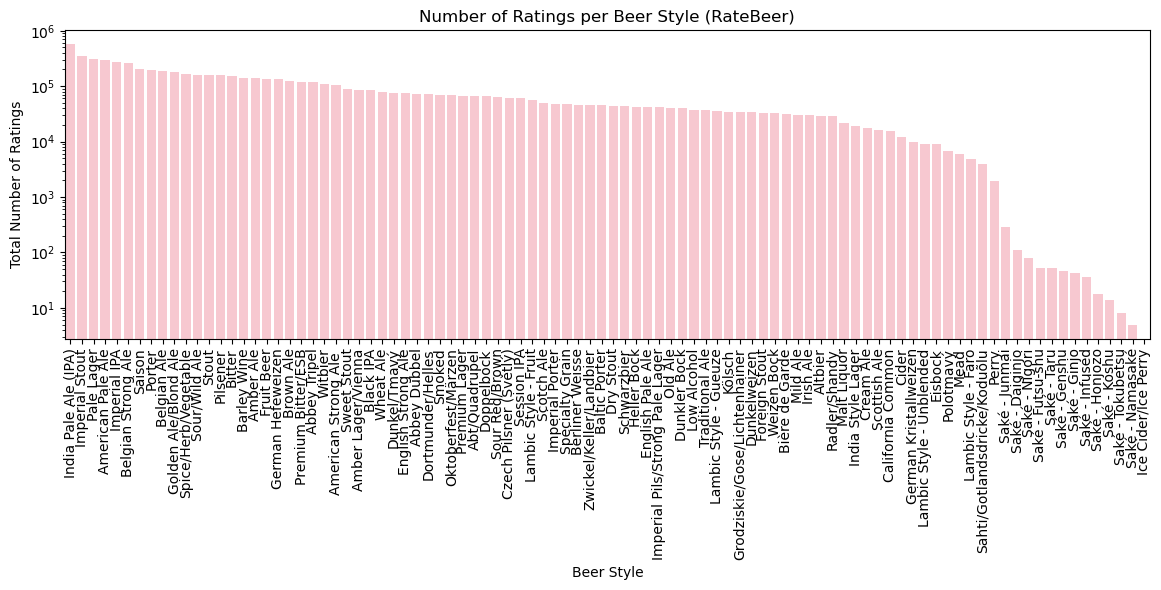

In [68]:
rb_ratings_style = beers_rb_f[['style', 'nbr_ratings']].groupby('style').sum().reset_index()
rb_ratings_style.head()

# Sort the data by the sum of ratings in descending order 
rb_ratings_style = rb_ratings_style.sort_values(by='nbr_ratings', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=rb_ratings_style, x='style', y='nbr_ratings', color='pink')
plt.title('Number of Ratings per Beer Style (RateBeer)')
plt.xlabel('Beer Style')
plt.ylabel('Total Number of Ratings')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.yscale('log')  # Set the y-axis to a log scale
plt.show()

# India Pale Ale, Imperial Stout, Pale lager are the styles that received the highest number of ratings in rb 

## Score per style 

/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


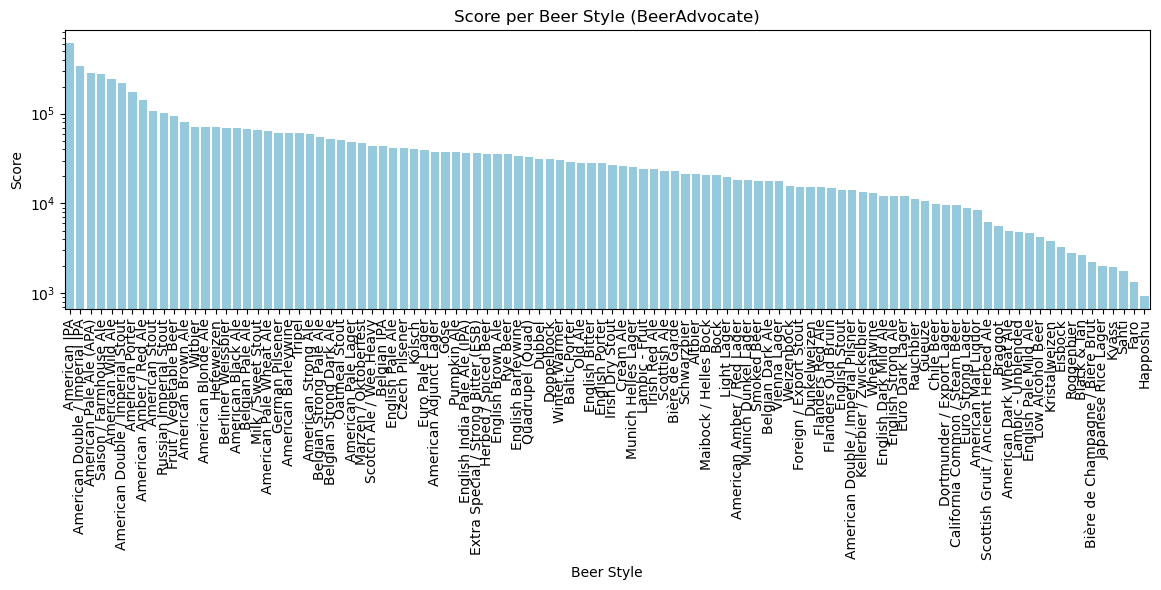

In [23]:
ba_score_style = beers_ba_f[['style', 'ba_score']].groupby('style').sum().reset_index()
ba_score_style.head()

# Sort the data by the sum of ratings in descending order 
ba_score_style = ba_score_style.sort_values(by='ba_score', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ba_score_style, x='style', y='ba_score', color='skyblue')
plt.title('Score per Beer Style (BeerAdvocate)')
plt.xlabel('Beer Style')
plt.ylabel('Score')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.yscale('log')  # Set the y-axis to a log scale

# American IPA, American Double/Imperial IPA, American Pale Ale are the styles that received the highest score in ba

# American IPA, American Double/Imperial IPA are the two most rated and the ones that have the highest score in ba

/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


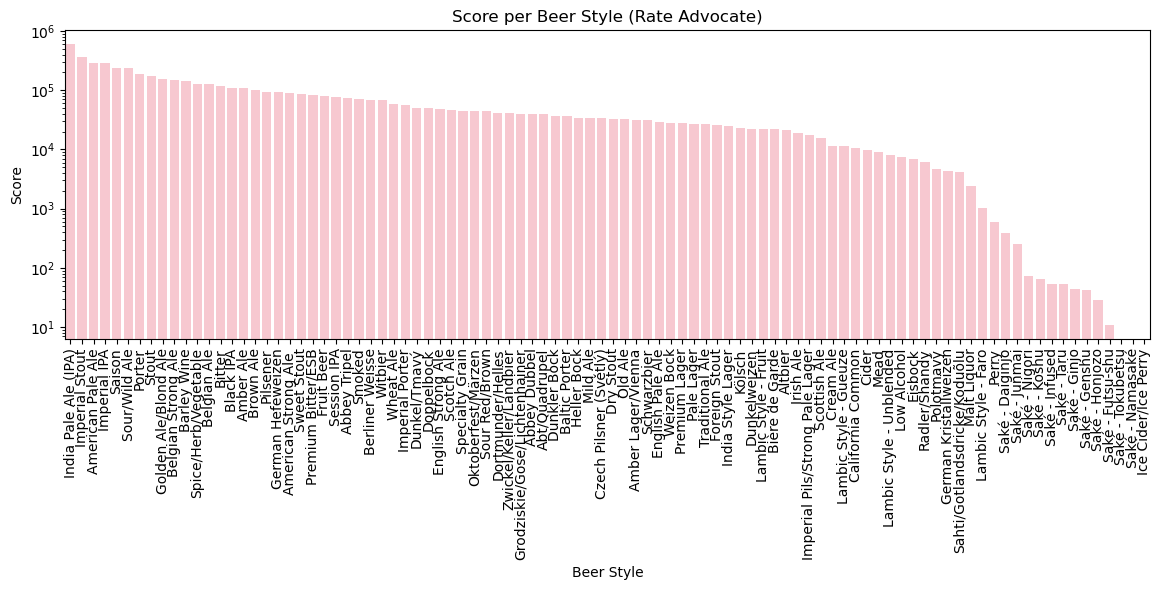

In [24]:
rb_score_style = beers_rb_f[['style', 'overall_score']].groupby('style').sum().reset_index()
rb_score_style.head()

# Sort the data by the sum of ratings in descending order 
rb_score_style = rb_score_style.sort_values(by='overall_score', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=rb_score_style, x='style', y='overall_score', color='pink')
plt.title('Score per Beer Style (Rate Advocate)')
plt.xlabel('Beer Style')
plt.ylabel('Score')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.yscale('log')  # Set the y-axis to a log scale

# India Pale Ale, Imperial Stout, American Pale Ale are the styles that received the highest scores in rb 

# India Pale Ale, Imperial Stout are the two most rated and the ones that have the highest score in rb 

# from both sites American Pale Ale is the third most liked by the people 

# 2. breweries.csv file study 

In [31]:
breweries_ba_f.shape

(16758, 4)

In [32]:
breweries_rb_f.shape

(24189, 4)

In [30]:
breweries_ba_f.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [33]:
breweries_rb_f.head()

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


In [27]:
breweries_ba_f['nbr_beers'].describe()

count    16758.000000
mean        21.056331
std         69.417841
min          0.000000
25%          2.000000
50%          6.000000
75%         18.000000
max       1196.000000
Name: nbr_beers, dtype: float64

In [26]:
breweries_rb_f['nbr_beers'].describe()

count    24189.000000
mean        19.022655
std         31.542620
min          0.000000
25%          3.000000
50%          8.000000
75%         20.000000
max        295.000000
Name: nbr_beers, dtype: float64

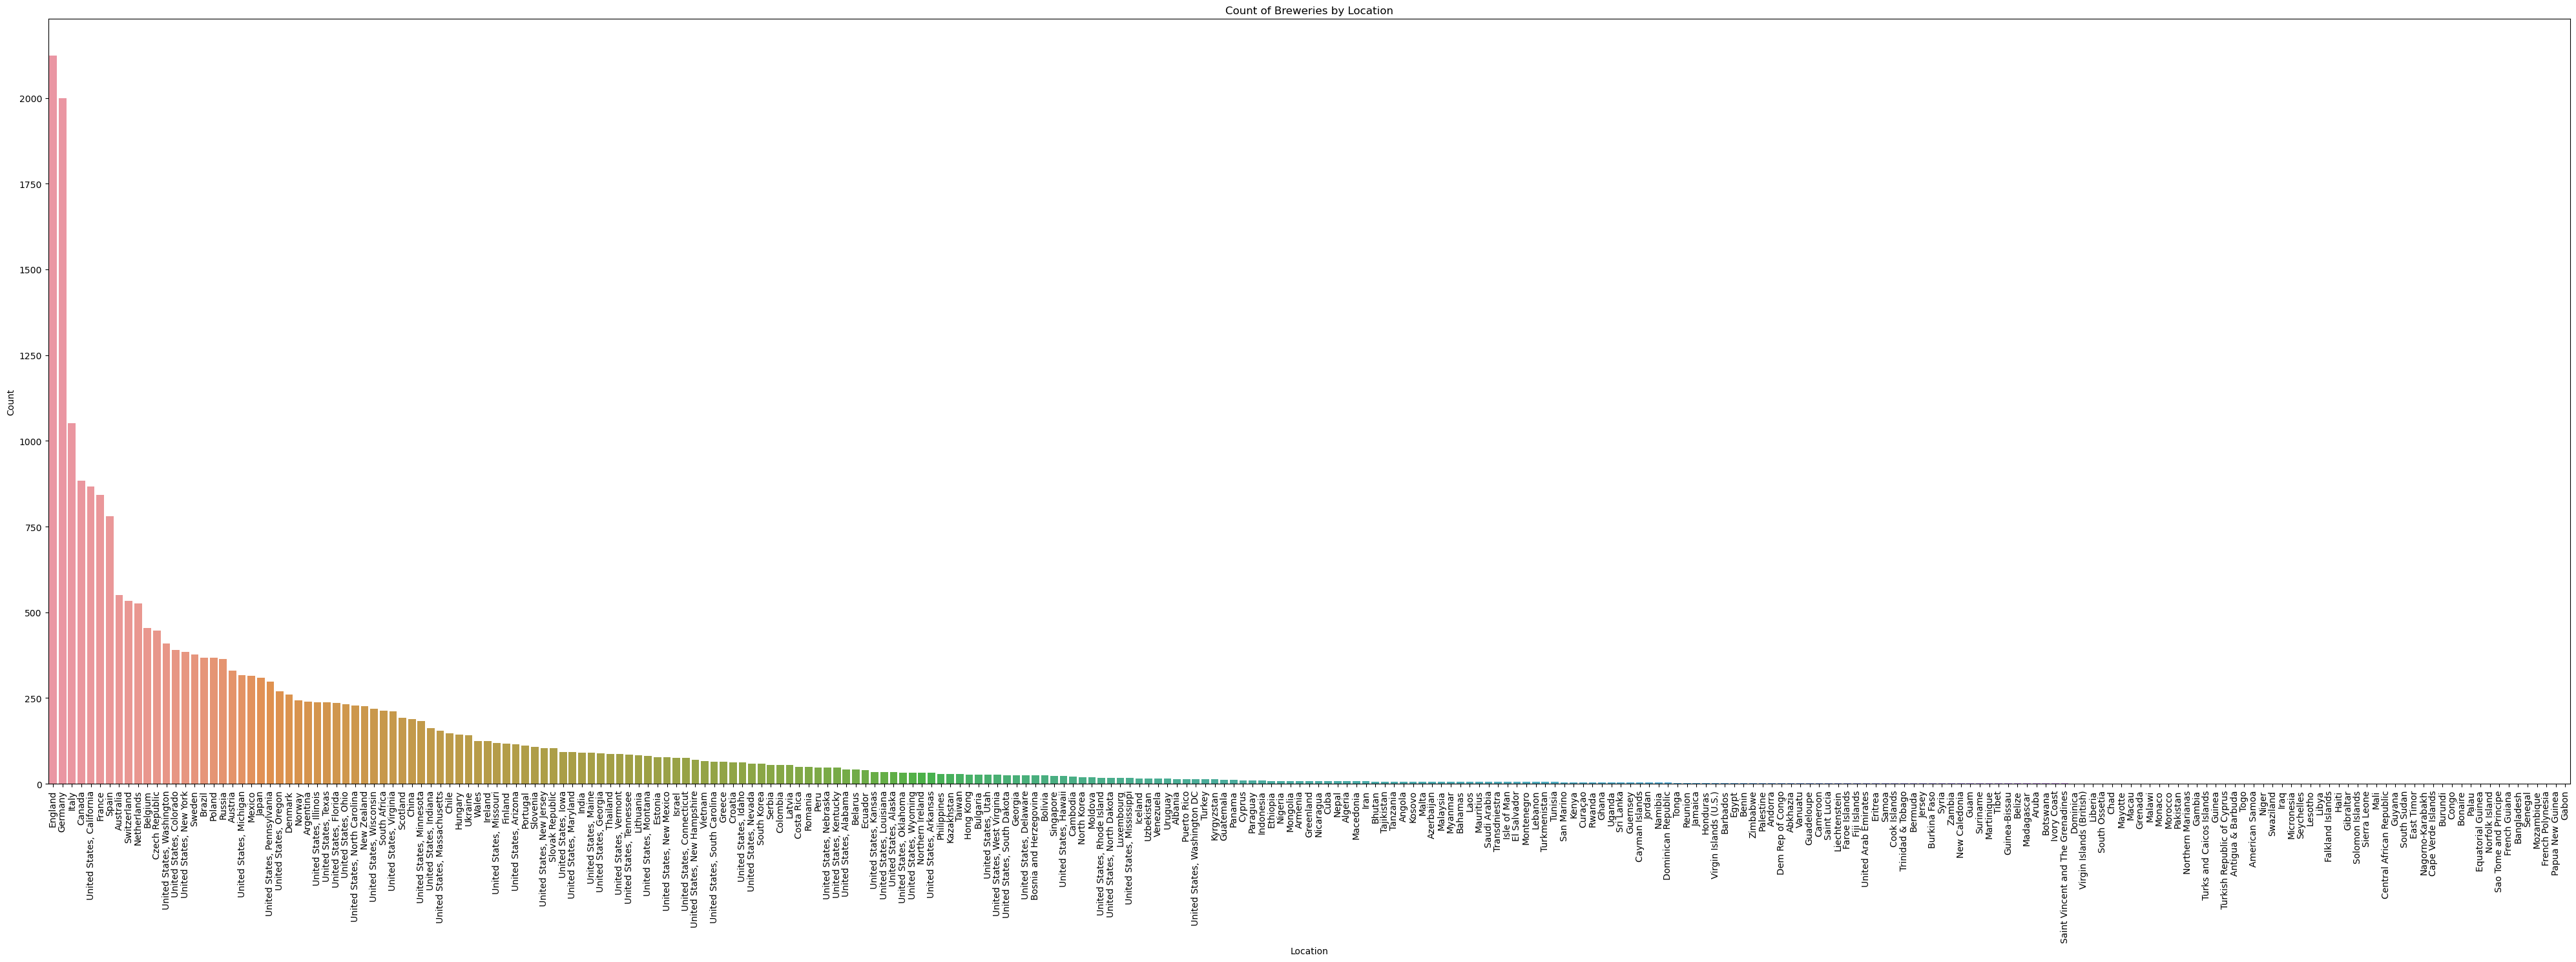

In [69]:
locations_rb = breweries_rb_f['location'].value_counts()
# 267 locations, but united states separated in states 

plt.figure(figsize=(40, 15))
ax = sns.countplot(data=breweries_rb_f, x='location', order=locations_rb.index)
plt.title('Count of Breweries by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# England has the highest number of breweries 
# But if we group all the states af the united states it might be the first country with the highest number of breweries 
# need to normalize maybe with the population or the size of the country 


# 3. beers.csv and brewery.csv merge 

In [29]:
# merge beers and brewery to study the locations of each style of beer
ba_beer_brewery= pd.merge(beers_ba_f, breweries_ba_f, left_on=['brewery_id'], right_on=['id'])
ba_beer_brewery = ba_beer_brewery.drop(columns=['beer_id','beer_name', 'avg_computed', 'zscore', 'nbr_matched_valid_ratings', 'avg_matched_valid_ratings', 'nbr_beers'])

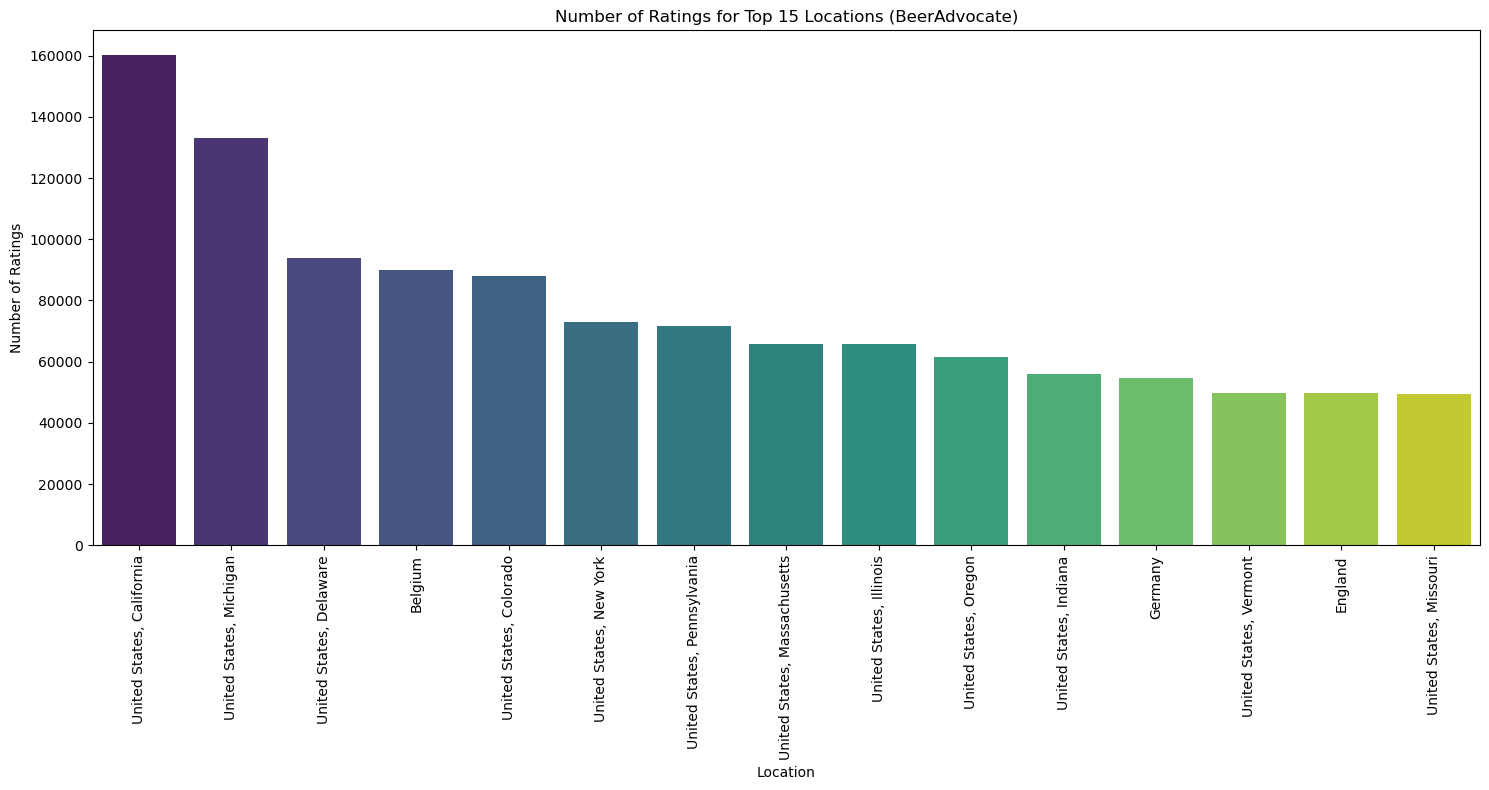

In [71]:
# Sort the DataFrame to find the top 15 highest-rated beers in each location
ba_highest_rated_per_location_top15 = ba_beer_brewery.groupby('location').apply(lambda x: x.nlargest(15, 'nbr_ratings')).reset_index(drop=True)

# Get the top 15 locations based on the sum of ratings for their top 15 beers
top_15_locations = ba_highest_rated_per_location_top15.groupby('location')['nbr_ratings'].sum().nlargest(15).index

# Filter the DataFrame to include only the top 15 locations
ba_highest_rated_per_location_top15 = ba_highest_rated_per_location_top15[ba_highest_rated_per_location_top15['location'].isin(top_15_locations)]

# Get the top 15 locations based on the sum of ratings for their top 15 beers
top_15_locations = ba_highest_rated_per_location_top15.groupby('location')['nbr_ratings'].sum().nlargest(15)

# Create a bar plot to visualize the number of ratings for the top 15 locations
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
ax = sns.barplot(x=top_15_locations.index, y=top_15_locations.values, palette='viridis')
plt.title('Number of Ratings for Top 15 Locations (BeerAdvocate)')
plt.xlabel('Location')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
# merge beers and brewery to study the locations of each style of beer
rb_beer_brewery= pd.merge(beers_rb_f, breweries_rb_f, left_on=['brewery_id'], right_on=['id'])
rb_beer_brewery = rb_beer_brewery.drop(columns=['beer_id','beer_name', 'avg_computed', 'zscore', 'nbr_matched_valid_ratings', 'avg_matched_valid_ratings', 'nbr_beers'])

/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/margot/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


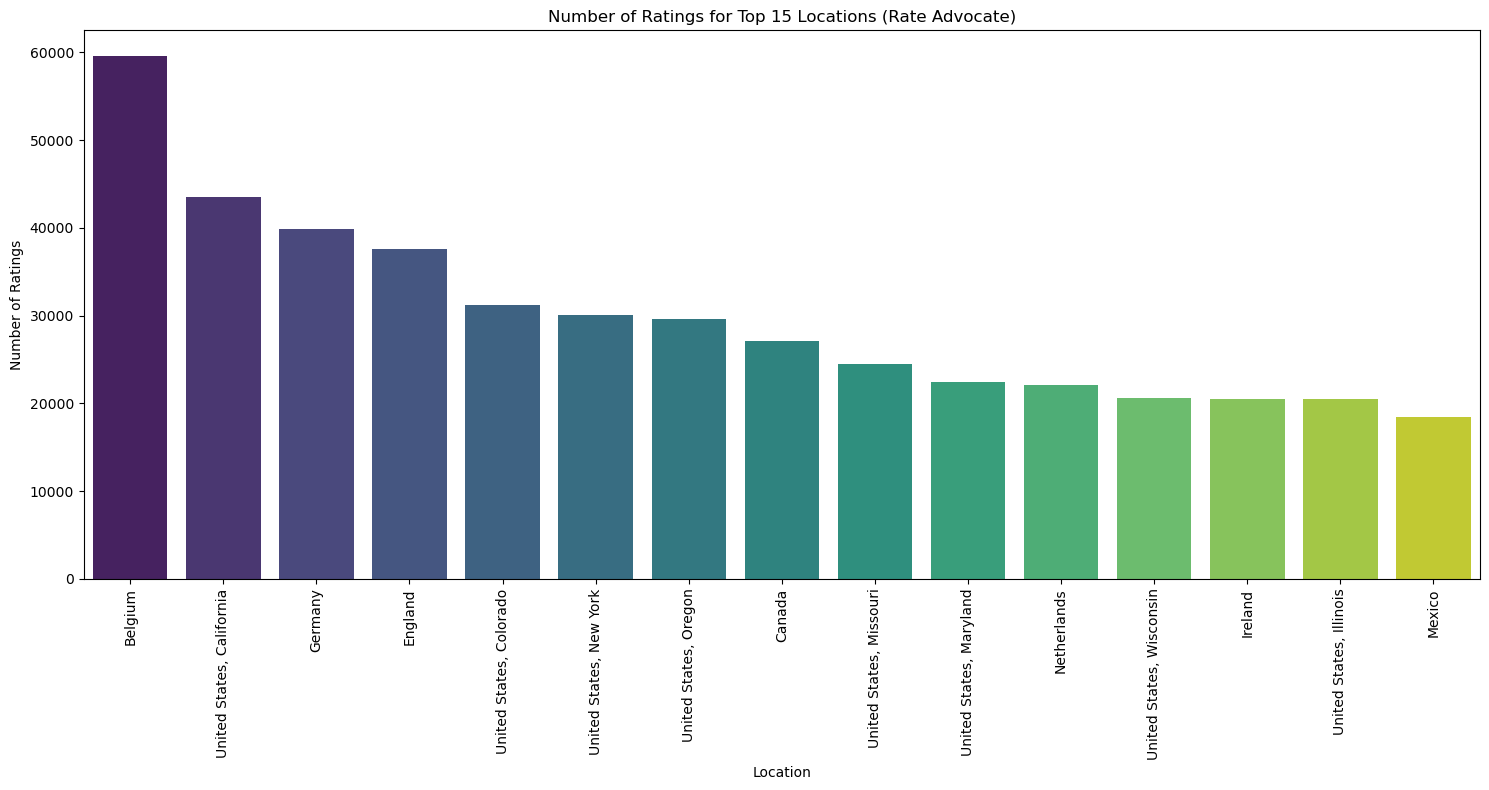

In [34]:
# Sort the DataFrame to find the top 15 highest-rated beers in each location
rb_highest_rated_per_location_top15 = rb_beer_brewery.groupby('location').apply(lambda x: x.nlargest(15, 'nbr_ratings')).reset_index(drop=True)

# Get the top 15 locations based on the sum of ratings for their top 15 beers
top_15_locations_rb = rb_highest_rated_per_location_top15.groupby('location')['nbr_ratings'].sum().nlargest(15).index

# Filter the DataFrame to include only the top 15 locations
rb_highest_rated_per_location_top15 = rb_highest_rated_per_location_top15[rb_highest_rated_per_location_top15['location'].isin(top_15_locations_rb)]

# Get the top 15 locations based on the sum of ratings for their top 15 beers
top_15_locations_rb = rb_highest_rated_per_location_top15.groupby('location')['nbr_ratings'].sum().nlargest(15)

# Create a bar plot to visualize the number of ratings for the top 15 locations
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
ax = sns.barplot(x=top_15_locations_rb.index, y=top_15_locations_rb.values, palette='viridis')
plt.title('Number of Ratings for Top 15 Locations (Rate Advocate)')
plt.xlabel('Location')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Big difference between rb and ba: mybe there are different trend patterns on both sites 

# 4. Users (pour avoir une idée).

In [8]:
users_ba.shape

(153704, 6)

In [9]:
users_rb.shape

(70174, 5)

In [10]:
users_ba.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [11]:
users_rb.head()

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany


In [12]:
print(users_rb.columns)


Index(['nbr_ratings', 'user_id', 'user_name', 'joined', 'location'], dtype='object')


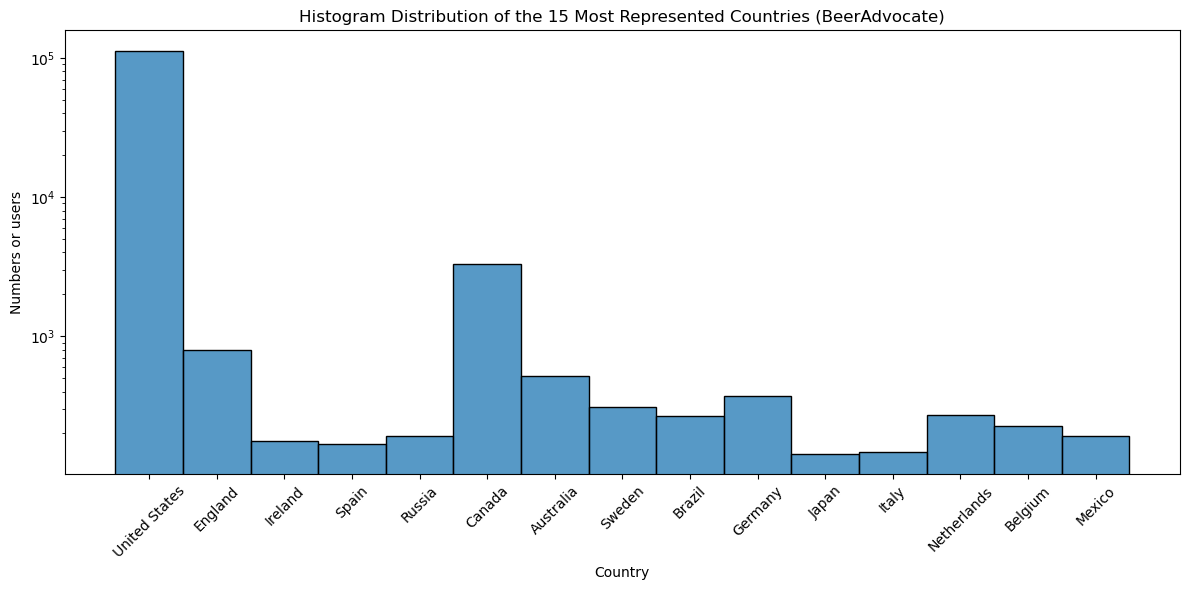

In [72]:
# Group variations of 'United States' in the 'country' column
users_ba['location'] = users_ba['location'].apply(lambda x: 'United States' if isinstance(x, str) and 'United States' in x else x)

# Get the 15 most represented countries
top_15_countries = users_ba['location'].value_counts().head(15).index

# Filter your data to include only the top 15 countries
filtered_data = users_ba[users_ba['location'].isin(top_15_countries)]

# Create a histogram distribution of the top 15 countries
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x='location', discrete=True, stat="count", common_norm=False, log= True)
plt.title('Histogram Distribution of the 15 Most Represented Countries (BeerAdvocate)')
plt.xlabel('Country')
plt.ylabel('Numbers or users')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


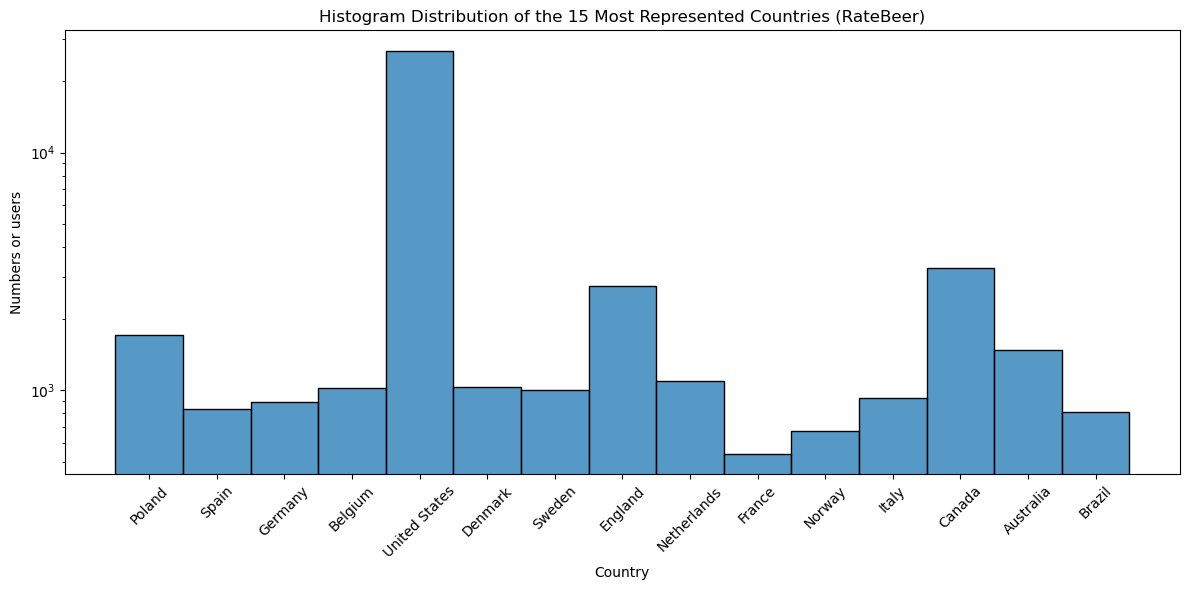

In [73]:
# Group variations of 'United States' in the 'country' column
users_rb['location'] = users_rb['location'].apply(lambda x: 'United States' if isinstance(x, str) and 'United States' in x else x)

# Get the 15 most represented countries
top_15_countries = users_rb['location'].value_counts().head(15).index

# Filter your data to include only the top 15 countries
filtered_data = users_rb[users_rb['location'].isin(top_15_countries)]

# Create a histogram distribution of the top 15 countries
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x='location', discrete=True, stat="count", common_norm=False, log = True)
plt.title('Histogram Distribution of the 15 Most Represented Countries (RateBeer)')
plt.xlabel('Country')
plt.ylabel('Numbers or users')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


## Test

In [74]:
# Convert Unix timestamps to 'YYYY-MM-DD' format and handle non-timestamp values
def convert_to_date(value):
    try:
        return pd.to_datetime(value, unit='s').strftime('%Y-%m-%d')
    except (TypeError, ValueError):
        return value

ratings_mbd_f['date'] = ratings_mbd_f.iloc[:, 7].apply(convert_to_date)

# Extract only the year from the 'date' column (assuming 'date' is already in datetime format)
ratings_mbd_f['year'] = pd.to_datetime(ratings_mbd_f['date'], errors='coerce', format='%Y-%m-%d', utc=True).dt.year

print(ratings_mbd_f['year'])

0        2011
1        2011
2        2012
3        2012
4        2012
         ... 
21959    2011
21960    2017
21961    2014
21962    2014
21963    2010
Name: year, Length: 21964, dtype: int32


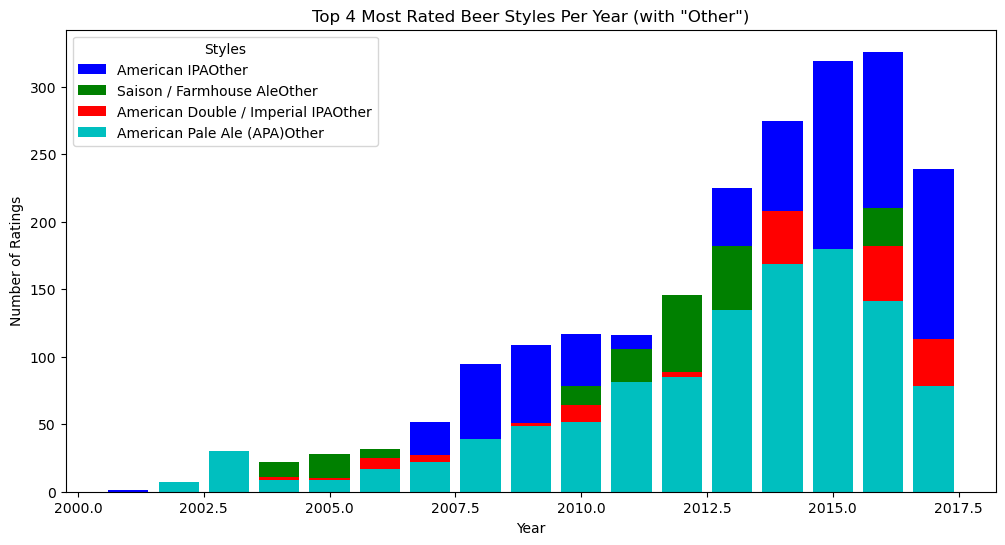

In [75]:
# Group the data by year and style and count the number of ratings
grouped = merged_df.groupby(['year', 'style']).size().unstack(fill_value=0)

# Determine the top 4 styles across the entire dataset and group the rest as "Other"
all_styles = grouped.columns
top_styles = grouped.sum().sort_values(ascending=False).head(4).index
other_styles = [style for style in all_styles if style not in top_styles]
grouped['Other'] = grouped[other_styles].sum(axis=1)

# Create the histogram
plt.figure(figsize=(12, 6))

# Define 5 distinct colors for the legend
colors = ['b', 'g', 'r', 'c', 'm']  # You can change these to your preferred colors

for year in merged_df['year'].unique():
    year_data = grouped.loc[year]

    # Plot the data for the top 4 styles and "Other" with distinct colors
    for i, style in enumerate(top_styles):
        ratings = year_data[style]
        plt.bar(year, ratings, color=colors[i], width=0.8, align='center')

# Add a single legend outside the loop
legend_labels = top_styles + ["Other"]
plt.legend(legend_labels, title='Styles', loc='upper left')

plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Top 4 Most Rated Beer Styles Per Year (with "Other")')
plt.show()


## Merge differents beers style

In [164]:
beers_ba_f['style'] = beers_ba_f['style'].str.lower()  # Optional: Convert styles to lowercase for case-insensitive matching

def categorize_style(style):
    if 'ipa' in style:
        return 'IPA'
    elif 'india pale ale' in style:
        return 'IPA'   
    elif 'lager' in style:
        return 'Lager'
    elif 'american pale ale' in style:
        return 'American Pale Ale'
    elif 'stout' in style:
        return 'Stout'
    elif 'bitter' in style:
        return 'Bitter'
    elif 'witbier' in style:
        return 'Witbier'
    elif 'saison' in style:
        return 'Saison'
    elif 'fruit' in style:
        return 'Fruit'    
    elif 'red ale' in style:
        return 'Red Ale' 
    elif 'brown ale' in style:
        return 'brown Ale'
    elif 'low alcohol beer' in style:
        return 'Low Alcohol Beer'
    
    else:
        return 'Other'

# Apply the categorize_style function to the 'style' column
beers_ba_f['bigger_style'] = beers_ba_f['style'].apply(categorize_style)

# Now, 'bigger_style' column will contain the categorized styles


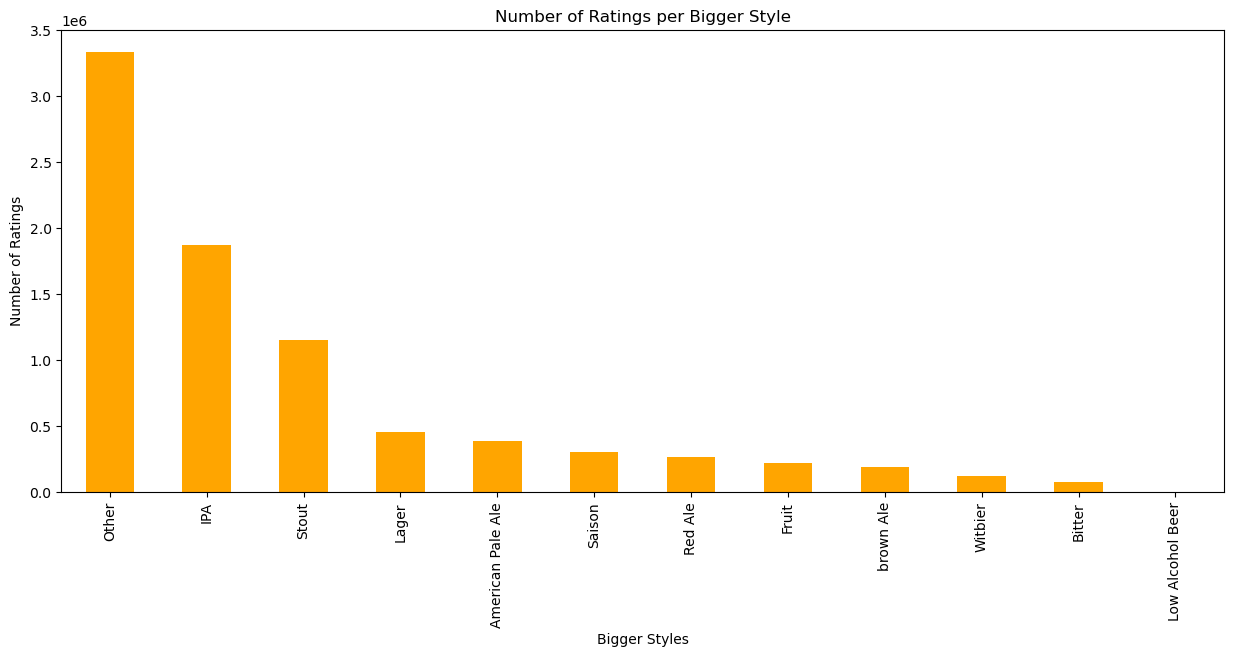

In [163]:
# Assuming beers_ba_f is your DataFrame with the 'bigger_style' and 'nbr_ratings' columns

# Group by 'bigger_style' and calculate the sum of 'nbr_ratings' for each group
ratings_per_style = beers_ba_f.groupby('bigger_style')['nbr_ratings'].sum().sort_values(ascending = False)

# Plotting the bar chart
plt.figure(figsize=(15, 6))
ratings_per_style.plot(kind='bar', color='orange')
plt.title('Number of Ratings per Bigger Style')
plt.xlabel('Bigger Styles')
plt.ylabel('Number of Ratings')
#plt.yscale('log')
plt.show()

# 5. Merged data files study 

In [ ]:
users_mbd_f.head()

In [ ]:
beers_mbd_f.columns

In [ ]:
users_mbd_f['nbr_ratings'].describe()

In [ ]:
users_mbd_f.isna().sum()

In [ ]:
ratings_mbd_f.iloc[:, 7]

In [ ]:
# Convert Unix timestamps to 'YYYY-MM-DD' format and handle non-timestamp values
def convert_to_date(value):
    try:
        return pd.to_datetime(value, unit='s').strftime('%Y-%m-%d')
    except (TypeError, ValueError):
        return value

ratings_mbd_f['date'] = ratings_mbd_f.iloc[:, 7].apply(convert_to_date)

# Extract only the year from the 'date' column (assuming 'date' is already in datetime format)
ratings_mbd_f['year'] = pd.to_datetime(ratings_mbd_f['date'], errors='coerce', format='%Y-%m-%d', utc=True).dt.year

print(ratings_mbd_f['year'])

In [ ]:
# Plot the numbers of ratings/year
plt.figure(figsize=(10, 6))
sns.histplot(data=ratings_mbd_f, x='year', bins=30, kde=True, color='skyblue')
plt.title('Histogram of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Merge 'ratings_mbd_f' and 'users_mbd_f' DataFrames based on 'user_name'
merged_df = ratings_mbd_f.merge(users_mbd_f, on='user_name', how='left').copy()
merged_df['location'] = merged_df['location'].apply(lambda x: 'United States' if isinstance(x, str) and 'United States' in x else x)
# Get the top 15 most represented locations
top_15_locations = merged_df['location'].value_counts().nlargest(15)

# Create a bar plot to visualize the number of ratings per location
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_15_locations.index, y=top_15_locations.values, color='skyblue')
plt.title('Number of Ratings per Countries (Top 15)')
plt.xlabel('Countries')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.yscale('log')
plt.show()

In [ ]:
# Get the top 15 most represented style of beer
top_15_style = ratings_mbd_f['style'].value_counts().nlargest(15)

# Create a bar plot to visualize the number of ratings per location
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_15_style.index, y=top_15_locations.values, color='skyblue')
plt.title('Number of Ratings per Style of beers (Top 15)')
plt.xlabel('Style of beers')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Study of Reviews data

## Proportion of different languages in reviews.csv

### For BeerAdvocate 

In [14]:
# Chunk size
chunk_size = 1000

# Initialize a list to store language vectors
lang_vectors = []

def clean_text(text):
    # Omit non-UTF-8 characters
    cleaned_text = ''.join(c for c in text if unicodedata.category(c) != 'Cc' or c == '\n')
    return cleaned_text

# Create a Reader object to read the CSV file in chunks
csv_reader = pd.read_csv(f"{path_ba}/reviews.csv", chunksize=chunk_size, encoding='utf-8')

# Iterate through all chunks
for chunk in csv_reader:
    # Initialize a list to store language vectors for the current chunk
    chunk_lang_vectors = []
    
    for index, row in chunk.iterrows():
        try:
            # Apply the language detection function to the text column
            # Unknown if NAN
            lang = cld2.detect(str(row['text']))[2][0][0] if pd.notna(row['text']) and cld2.detect(str(row['text']))[2] else 'NaN'
            # Add the language to the list
            chunk_lang_vectors.append(lang)

        except Exception as e:
            # Clean the text only for the row that caused an error
            cleaned_text = clean_text(str(row['text']))
            # Reapply language detection after cleaning
            lang = cld2.detect(cleaned_text)[2][0][0] if cld2.detect(cleaned_text)[2] else 'NaN'
            # Add the language to the list
            chunk_lang_vectors.append(lang)

    # Concatenate the language vectors for the current chunk
    chunk_lang_series = pd.Series(chunk_lang_vectors, name='lang')
    lang_vectors.append(chunk_lang_series)

# Concatenate all language vectors into a single vector
result_lang_vector = pd.concat(lang_vectors, ignore_index=True)

# Display the result
print(result_lang_vector.unique())


['ENGLISH' 'FRENCH' 'FINNISH' 'PORTUGUESE' 'SPANISH' 'ITALIAN' 'DUTCH'
 'Unknown' 'DANISH' 'CZECH' 'GERMAN' 'CATALAN' 'CROATIAN' 'RUSSIAN'
 'TURKISH' 'SWEDISH' 'ESTONIAN' 'AFRIKAANS' 'NaN' 'NORWEGIAN' 'Chinese']


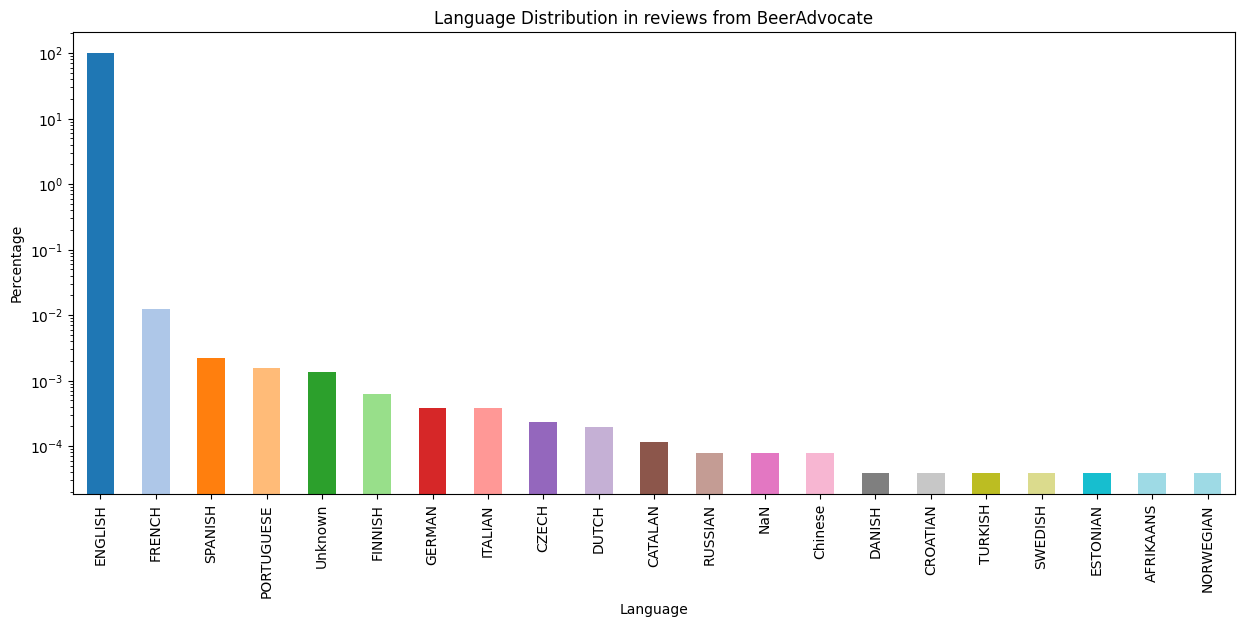

Percentage of unrecognized language: 0.0014%
Percentage of empty comments: 0.00008%


In [36]:
# Plot percentage

# Calculate the counts of each language
lang_counts = result_lang_vector.value_counts()

# Calculate the percentage of each language
lang_percentages = lang_counts / lang_counts.sum() * 100

# Plotting
plt.figure(figsize=(15, 6))
ax = lang_percentages.plot(kind='bar', color=plt.cm.tab20(np.linspace(0, 1, len(lang_percentages))), logy=True)
plt.title('Language Distribution in reviews from BeerAdvocate')
plt.xlabel('Language')
plt.ylabel('Percentage')

plt.show()

print(f"Percentage of unrecognized language: {lang_percentages.get('Unknown', 0):.4f}%")
print(f"Percentage of empty comments: {lang_percentages.get('NaN', 0):.5f}%")


Unsurprisingly, over 99% of comments are written in English, 0.0014% of comments are in a language not recognized by cld2 and nd a very small number are empty.

### For RateBeer

In [39]:
# Chunk size
chunk_size = 1000

# Initialize a list to store language vectors
lang_vectors_rb = []

def clean_text(text):
    # Omit non-UTF-8 characters
    cleaned_text = ''.join(c for c in text if unicodedata.category(c) != 'Cc' or c == '\n')
    return cleaned_text

# Create a Reader object to read the CSV file in chunks
csv_reader = pd.read_csv(f"{path_rb}/reviews.csv", chunksize=chunk_size, encoding='utf-8')

# Iterate through all chunks
for chunk in csv_reader:
    # Initialize a list to store language vectors for the current chunk
    chunk_lang_vectors = []
    
    for index, row in chunk.iterrows():
        try:
            # Apply the language detection function to the text column
            # Unknown if NAN
            lang = cld2.detect(str(row['text']))[2][0][0] if pd.notna(row['text']) and cld2.detect(str(row['text']))[2] else 'NaN'
            # Add the language to the list
            chunk_lang_vectors.append(lang)

        except Exception as e:
            # Clean the text only for the row that caused an error
            cleaned_text = clean_text(str(row['text']))
            # Reapply language detection after cleaning
            lang = cld2.detect(cleaned_text)[2][0][0] if cld2.detect(cleaned_text)[2] else 'NaN'
            # Add the language to the list
            chunk_lang_vectors.append(lang)

    # Concatenate the language vectors for the current chunk
    chunk_lang_series = pd.Series(chunk_lang_vectors, name='lang')
    lang_vectors_rb.append(chunk_lang_series)

# Concatenate all language vectors into a single vector
result_lang_vector_rb = pd.concat(lang_vectors_rb, ignore_index=True)

# Display the result
print(result_lang_vector_rb.unique())

['POLISH' 'SPANISH' 'ENGLISH' 'Unknown' 'GERMAN' 'SWEDISH' 'NORWEGIAN'
 'ITALIAN' 'DANISH' 'FINNISH' 'FRENCH' 'RUSSIAN' 'HUNGARIAN' 'CROATIAN'
 'DUTCH' 'WARAY_PHILIPPINES' 'IRISH' 'CATALAN' 'Korean' 'NaN' 'PORTUGUESE'
 'Japanese' 'Chinese' 'SLOVAK' 'CZECH' 'LITHUANIAN' 'ROMANIAN'
 'NORWEGIAN_N' 'UKRAINIAN' 'TURKISH' 'BOSNIAN' 'SERBIAN' 'ESTONIAN'
 'BULGARIAN' 'ICELANDIC' 'LATIN' 'LATVIAN' 'INDONESIAN' 'NAURU' 'CORSICAN'
 'AFRIKAANS' 'FAROESE' 'THAI' 'ChineseT' 'YORUBA' 'GREEK' 'GALICIAN'
 'INTERLINGUA' 'LUXEMBOURGISH' 'MACEDONIAN' 'VOLAPUK' 'SLOVENIAN' 'SCOTS'
 'SAMOAN' 'RHAETO_ROMANCE' 'MALTESE' 'WELSH' 'BASQUE' 'SWAHILI' 'OCCITAN'
 'KYRGYZ' 'GUARANI' 'MALAY' 'ZULU' 'X_PIG_LATIN' 'HAITIAN_CREOLE' 'ARABIC'
 'JAVANESE']


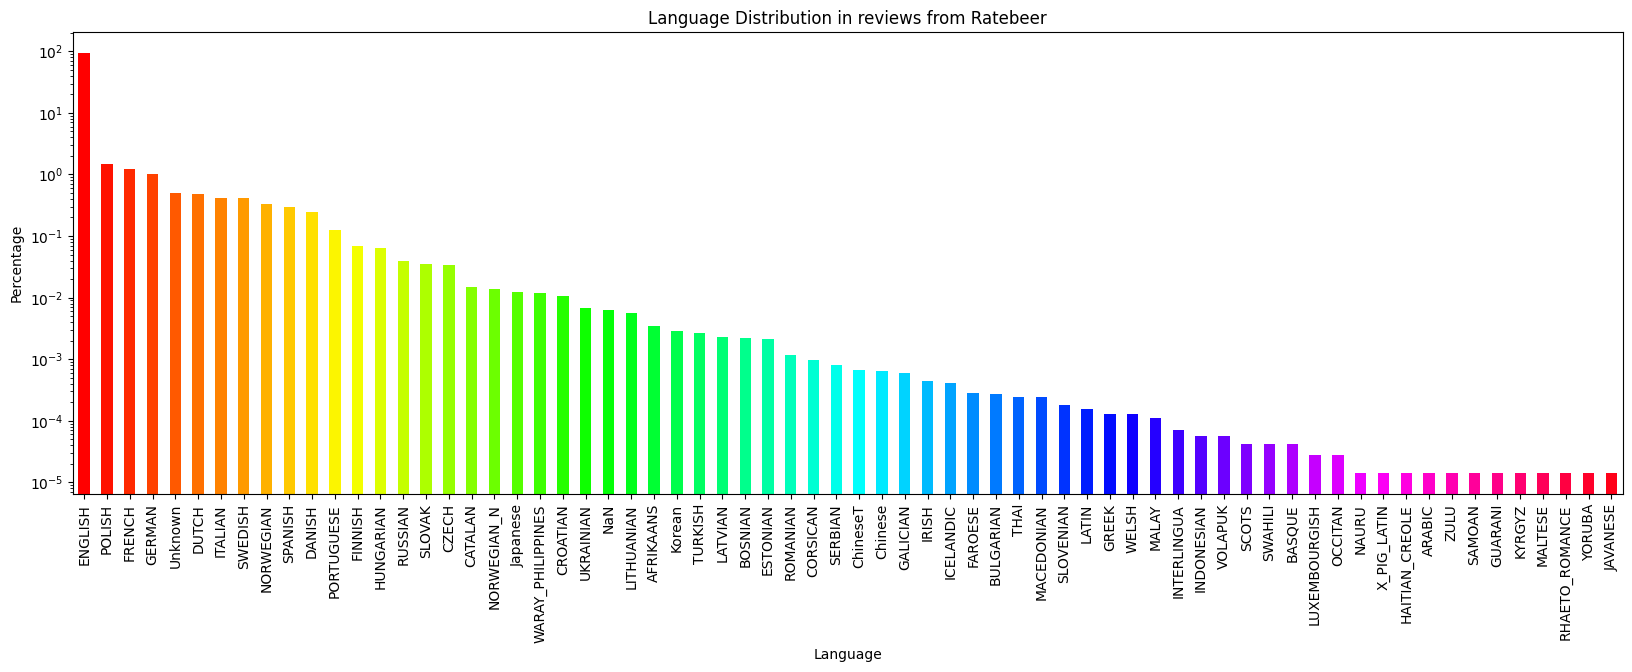

Percentage of unrecognized language: 0.5077%
Percentage of empty comments: 0.0063%


In [52]:
# Plot ratio

# Calculate the counts of each language
lang_counts_rb = result_lang_vector_rb.value_counts()

# Calculate the ratio of each language
lang_percentages_rb = lang_counts_rb / lang_counts_rb.sum() * 100

# Plotting
plt.figure(figsize=(20, 6))
ax = lang_percentages_rb.plot(kind='bar', color=plt.cm.hsv(np.linspace(0, 1, len(lang_percentages_rb))),logy=True)
plt.title('Language Distribution in reviews from Ratebeer')
plt.xlabel('Language')
plt.ylabel('Percentage')

plt.show()

print(f"Percentage of unrecognized language: {lang_percentages_rb.get('Unknown', 0):.4f}%")
print(f"Percentage of empty comments: {lang_percentages_rb.get('NaN', 0):.4f}%")

Once again, English is by far the dominant language. However, there are many more languages than in BeerAdvocate.
There are also more empty comments and unrecognized languages. This is due to the number of comments, as rate beer's dataset contains 7 122 074 comments compared to the 2 589 586 comments in BeerAdvocate's dataset.

## ZONE DE TEST 

In [12]:
test = pd.read_csv('../data/BeerAdvocate/reviews.csv')

In [41]:
test = pd.read_csv('../data/RateBeer/reviews.csv')

## Reviews BeerAdvocate

In [27]:
# Start by loading reviews.csv from BeerAdvocate
reviews_ba = pd.read_csv(f'{path_ba}/reviews.csv')
reviews_ba_f = reviews_ba.copy(deep=True)

users_ba_f= users_ba.copy(deep=True)

# Relieve RAM
del reviews_ba

In [9]:
# Modify date information 
# Convert Unix timestamps to 'YYYY-MM-DD' format and handle non-timestamp values
def convert_to_date(value):
    try:
        return pd.to_datetime(value, unit='s').strftime('%Y-%m-%d')
    except (TypeError, ValueError):
        return value

In [28]:
# Merge users in reviews file with their countries info
# fusionner cette cellule avec l'autre traitement de Beer Advocate plus bas !


reviews_ba_f = reviews_ba_f.merge(users_ba_f, on='user_name', how='left')
reviews_ba_f['location'] = reviews_ba_f['location'].apply(lambda x: 'United States' if isinstance(x, str) and 'United States' in x else x)

reviews_ba_f['date'] = reviews_ba_f['date'].apply(convert_to_date)
reviews_ba_f['joined'] = reviews_ba_f['joined'].apply(convert_to_date)


# Extract only the year from the 'date' column (assuming 'date' is already in datetime format)
reviews_ba_f['date'] = pd.to_datetime(reviews_ba_f['date'], errors='coerce', format='%Y-%m-%d', utc=True).dt.year.astype('Int32')
reviews_ba_f['joined'] = pd.to_datetime(reviews_ba_f['joined'], errors='coerce', format='%Y-%m-%d', utc=True).dt.year.astype('Int32')

In [29]:
reviews_ba_f.isna().sum()

beer_name           0
beer_id             0
brewery_name        0
brewery_id          0
style               0
abv             65983
date                0
user_name           3
user_id_x           0
appearance      32009
aroma           32009
palate          32009
taste           32009
overall         32009
rating              0
text                2
nbr_ratings         0
nbr_reviews         0
user_id_y           0
joined          88372
location        95108
dtype: int64

We note the presence of 88372 users whose date of joining BeerAdvocate is unknown. And 95108 did not specify their location. That's pretty minimal, we have enough location data.

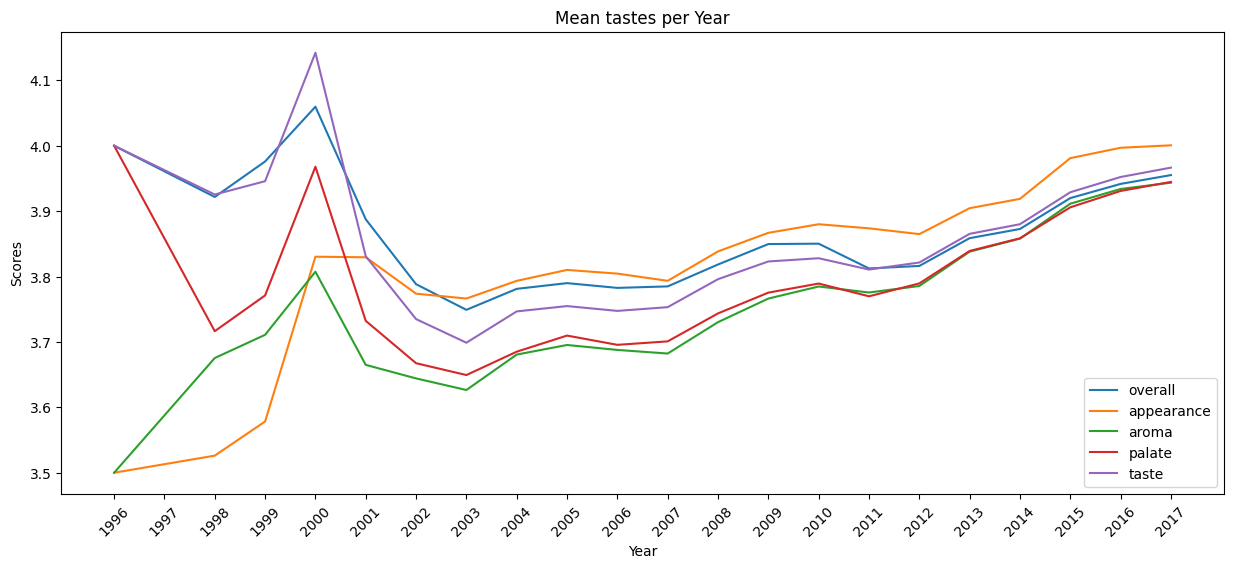

In [83]:
#Evolution of mean tastes along the years 
summary_df = reviews_ba_f.groupby('date').agg({'overall': 'mean', 'appearance': 'mean','aroma': 'mean', 'palate': 'mean', 'taste': 'mean'}).reset_index()
plt.figure(figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Scores')
plt.title('Mean tastes per Year')


plt.plot(summary_df['date'], summary_df['overall'], label='overall')
plt.plot(summary_df['date'], summary_df['appearance'], label='appearance')
plt.plot(summary_df['date'], summary_df['aroma'], label='aroma')
plt.plot(summary_df['date'], summary_df['palate'], label='palate')
plt.plot(summary_df['date'], summary_df['taste'], label='taste')
plt.xticks(np.arange(1996, 2018, step=1),rotation=45)

plt.legend()
plt.show()

We have comments from 1996 users. Let's see how many there are:

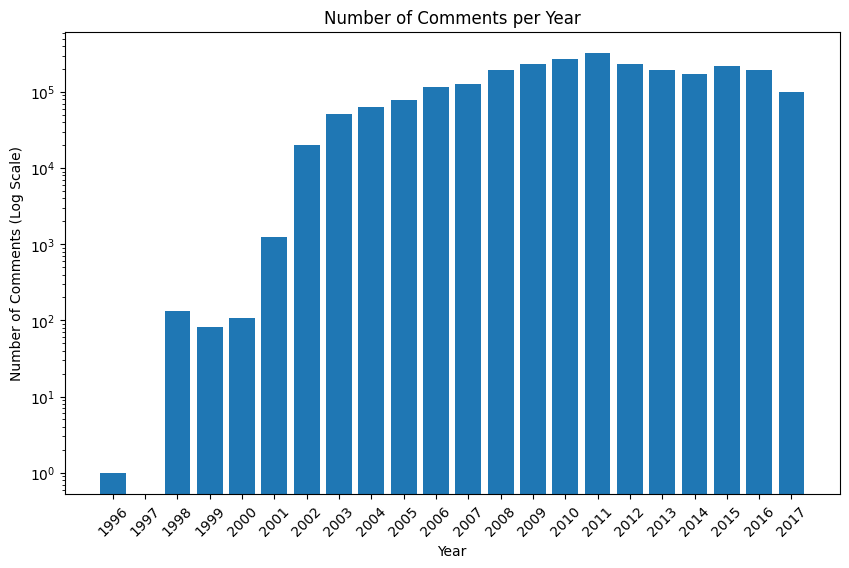

In [101]:
comments_per_year = reviews_ba_f.groupby('date')["text"].count().reset_index()
comments_per_year.columns = ['Year', 'nb of comments']

plt.figure(figsize=(10, 6))
plt.bar(comments_per_year['Year'], comments_per_year['nb of comments'])
plt.yscale('log')
plt.title('Number of Comments per Year')
plt.xlabel('Year')
plt.ylabel('Number of Comments (Log Scale)')
plt.xticks(np.arange(1996, 2018, step=1),rotation=45)

plt.show()

There was only one comment in 1996 and 0 in 1997. The graph above can therefore only be interpreted from 2002 onwards, when the number of comments is at least 20,000.

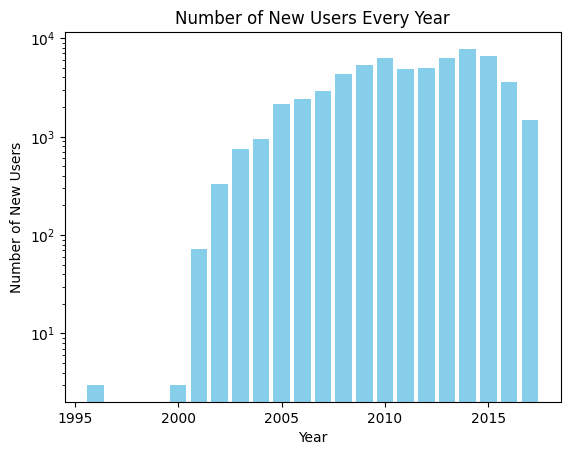

In [100]:
#Evolution of the number of new members along the years 

new_users_per_year = reviews_ba_f.groupby('joined')['user_id_y'].nunique()

plt.bar(new_users_per_year.index, new_users_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.yscale('log')
plt.ylabel('Number of New Users')
plt.title('Number of New Users Every Year')
plt.show()


The number of new users seems to correlate with the number of comments per year.

Exploring grades 

In [45]:
reviews_ba_f[['palate', 'taste', 'aroma', "appearance", 'overall']].describe()


,palate,taste,aroma,appearance,overall
count,2.557577e+06,2.557577e+06,2.557577e+06,2.557577e+06,2.557577e+06
mean,3.798682e+00,3.836279e+00,3.794767e+00,3.884245e+00,3.846197e+00
std,6.507799e-01,6.936974e-01,6.611576e-01,5.868417e-01,6.719210e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,4.000000e+00,4.250000e+00,4.250000e+00,4.250000e+00,4.250000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


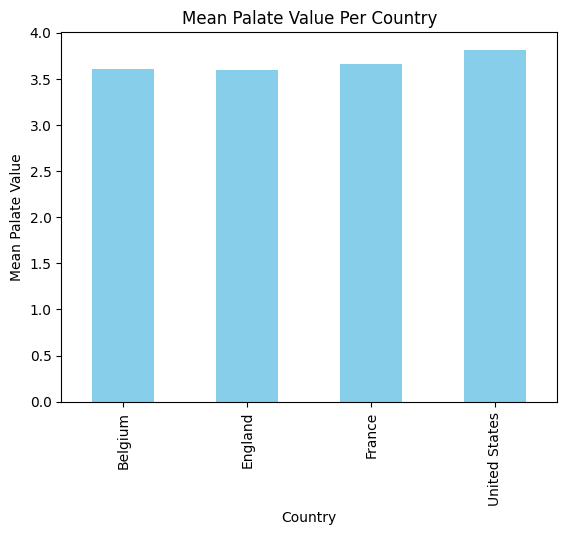

In [39]:
# Mean palate scores per countries 

selected_countries = ['United States', 'Belgium', 'England', 'France']
selected = reviews_ba_f[reviews_ba_f['location'].isin(selected_countries)]
palate_per_countries = selected.groupby('location')['palate'].mean()


palate_per_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Mean Palate Value')
plt.title('Mean Palate Value Per Country')
plt.show()

## Reviews RateBeer

In [13]:
# Start by loading reviews.csv from BeerAdvocate
reviews_rb_f = pd.read_csv(f'{path_rb}/reviews.csv')
users_rb_f= users_rb.copy(deep=True)

In [14]:
# Merge users in reviews file with their countries info

reviews_rb_f = reviews_rb_f.merge(users_rb_f, on='user_name', how='left')
reviews_rb_f['location'] = reviews_rb_f['location'].apply(lambda x: 'United States' if isinstance(x, str) and 'United States' in x else x)



reviews_rb_f['date'] = reviews_rb_f['date'].apply(convert_to_date)
reviews_rb_f['joined'] = reviews_rb_f['joined'].apply(convert_to_date)


# Extract only the year from the 'date' column (assuming 'date' is already in datetime format)
reviews_rb_f['date'] = pd.to_datetime(reviews_rb_f['date'], errors='coerce', format='%Y-%m-%d', utc=True).dt.year.astype('Int32')
reviews_rb_f['joined'] = pd.to_datetime(reviews_rb_f['joined'], errors='coerce', format='%Y-%m-%d', utc=True).dt.year.astype('Int32')

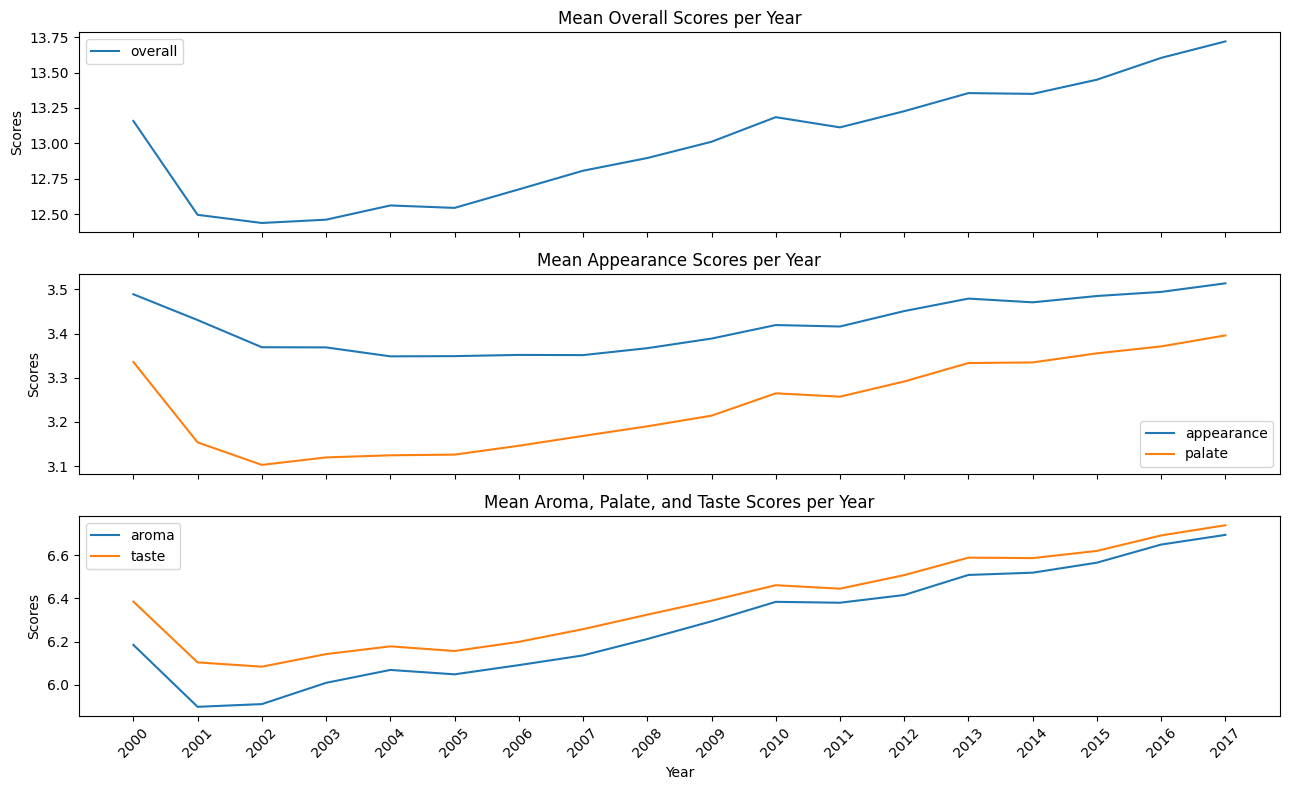

In [24]:
summary_df1 = reviews_rb_f.groupby('date').agg({'overall': 'mean', 'appearance': 'mean','aroma': 'mean', 'palate': 'mean', 'taste': 'mean'}).reset_index()

# Create a figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(13, 8), sharex=True)

# Plot for 'overall'
axs[0].plot(summary_df1['date'], summary_df1['overall'], label='overall')
axs[0].set_ylabel('Scores')
axs[0].set_title('Mean Overall Scores per Year')
axs[0].legend()

# Plot for 'appearance'
axs[1].plot(summary_df1['date'], summary_df1['appearance'], label='appearance')
axs[1].plot(summary_df1['date'], summary_df1['palate'], label='palate')
axs[1].set_ylabel('Scores')
axs[1].set_title('Mean Appearance Scores per Year')
axs[1].legend()

# Plot for 'aroma', 'palate', 'taste'
axs[2].plot(summary_df1['date'], summary_df1['aroma'], label='aroma')

axs[2].plot(summary_df1['date'], summary_df1['taste'], label='taste')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Scores')
axs[2].set_title('Mean Aroma, Palate, and Taste Scores per Year')
axs[2].legend()
axs[2].set_xticks(np.arange(2000, 2018, step=1))
axs[2].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
